# INN Hotels

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

**Load Data**

In [2]:
# Load data
inn_data = pd.read_csv("..data/INNHotels_INNHotelsGroup.csv")

In [3]:
# Make sure data was loaded correctly
inn_data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Data Overview

- Observations
- Sanity checks

In [4]:
# Let's view a random sample from the data. Setting the random_state to 2 to ensure we get the same results every time
inn_data.sample(10, random_state=2)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
3281    INN03282             2               0                     2   
27326   INN27327             2               0                     1   
22178   INN22179             2               0                     0   
16974   INN16975             2               0                     0   
6931    INN06932             2               0                     0   
26515   INN26516             1               0                     0   
1652    INN01653             2               0                     0   
3902    INN03903             2               0                     1   
2454    INN02455             2               0                     0   
29814   INN29815             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
3281                   3       Meal Plan 1                           0   
27326                  1      Not Selected                           0   
22178                  2      Not Selected                           0   
16974                  2       Meal Plan 1                           0   
6931                   1       Meal Plan 1                           0   
26515                  1       Meal Plan 1                           1   
1652                   2       Meal Plan 2                           0   
3902                   5       Meal Plan 1                           0   
2454                   2       Meal Plan 1                           0   
29814                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
3281         Room_Type 1        303          2018              8   
27326        Room_Type 1         91          2018              4   
22178        Room_Type 1          0          2018              4   
16974        Room_Type 1         93          2017              7   
6931         Room_Type 4         88          2018              8   
26515        Room_Type 1          0          2018              3   
1652         Room_Type 1        377          2018             10   
3902         Room_Type 4        113          2018              7   
2454         Room_Type 1         19          2018              2   
29814        Room_Type 1        118          2018              9   

       arrival_date market_segment_type  repeated_guest  \
3281             19             Offline               0   
27326             9              Online               0   
22178             7              Online               0   
16974            23              Online               0   
6931             19              Online               0   
26515            10           Corporate               0   
1652             14              Online               0   
3902              5              Online               0   
2454             12              Online               0   
29814             3             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
3281                              0                                     0   
27326                             0                                     0   
22178                             0                                     0   
16974                             0                                     0   
6931                              0                                     0   
26515                             0                                     0   
1652                              0                                     0   
3902                              0                                     0   
2454                              0                                     0   
29814                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
3281                78.00                       1   Not_Canceled  
27326            

In [5]:
#Checking the shape of the data, column datatypes and number of non-null values
inn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observation
* There are a total of 19 columns and 36275 rows 
* None of the columns have any null values
* The column names look valid and won't require cleanup 
* There are 14 numeric columns and 6 catergorical columns in the dataset
* Booking_ID is an ID column that will not be useful to build a model or generate insight from the data
* Some of the numeric columns (arrival_year, arrival_month, arrival_date) contain temporal data. We might benefit from transforming these data into catergories. We will explore this possibility further into our analysis



In [6]:
# checking for duplicate values
inn_data.duplicated().sum()

0

#### Observation
* The dataset has no duplicate rows

**We will make a copy of the dataset as to not make any changes to the original data. Also we will transform the object type columns to categorical type to reduce the data space required to store the dataframe**

In [87]:
# copying data to another variable to avoid any changes to original data
df = inn_data.copy()

**Let's convert the object type columns into categories**

In [88]:
# As good practice let's convert the object type columns to categorical columns
df = df.astype({'Booking_ID':'category','type_of_meal_plan':'category','room_type_reserved':'category'
                ,'market_segment_type':'category','booking_status':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

### Summary of the Dataset

In [185]:
# Get the total number of unique values for each column
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

#### Observation
* A few numeric columns have 2 unique values indicating they are flags. These are: required_car_parking_space and repeated_guest 
* The dataset has one row per booking ID
* Some of the continous variables such as no_of_adults, no_of_children and no_of_special_requests have very small sets of unique values

Let's drop the Booking ID column before doing further analysis as it is an ID columns and will not provide any helpful insight

In [89]:
#We will drop the Booking_ID columns as it is not useful for our analysis and model building
df.drop(columns='Booking_ID',inplace=True)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

**Now let's check the unique values for our dependent variable booking_status**

In [7]:
# Let's list all the unique values and number of times they appear for that column
flag_columns = ['booking_status']
for i in flag_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("-" * 50)

Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
--------------------------------------------------


**Observation**
* The dataset is imbalanced as the frequency of class Not_Canceled is double the frequency of class Canceled. This will make our decision tree model more biased. 
* In order to deal with the bias, we will have to give more weight to class Canceled while building the Decision Tree Model

**Let's check the unique values for our numeric columns with two unique values only: required_car_parking_space and repeated_guest**

In [12]:
# Let's list all the unique values and number of times they appear for that column
flag_columns = ['required_car_parking_space','repeated_guest']
for i in flag_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("-" * 50)

Unique values in required_car_parking_space are :
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
--------------------------------------------------
Unique values in repeated_guest are :
0    35345
1      930
Name: repeated_guest, dtype: int64
--------------------------------------------------


**Observation**
* These two columns are already in One Hot Encoding form and we will not need any further transformation for the algorithm running to work.

##### Let's check the number of each unique values for rest of the categorical columns

In [13]:
# Let's list all the unique values and number of times they appear for that column
cat_columns = ['type_of_meal_plan','room_type_reserved','market_segment_type']
for i in cat_columns:
    print("Unique values in", i, "are :",'\n')
    print(df[i].value_counts())
    print("-" * 50)

Unique values in type_of_meal_plan are : 

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
--------------------------------------------------
Unique values in room_type_reserved are : 

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
--------------------------------------------------
Unique values in market_segment_type are : 

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
--------------------------------------------------


#### Observation
* Each value assigned for the categorical columns are valid
* Room Type 1 is the most popular room among customers
* Most people placed their booking through online platforms
* Meal Plan 1 is the most popular option selected, followed by not selecting any meal plan
* Both type_of_meal_plan column, we could combine and re-classify it into Meal Plan selected and no Meal Plan selected. However, as the column has been encoded by the Hotel. That means they are expecting to see if these types have any effect on the booking calcellation. Therefore we will not transform these two columns for the sake of reducing the dimentionality
* For rest of the categorical columns, we have little chance of reducing the number of options/values as they do not fall into any common sub-category


**Let's check the number of each unique values for the temporal data**

In [14]:
# Let's list all the unique values and number of times they appear for that column
t_columns = ['arrival_year','arrival_month','arrival_date']
for i in t_columns:
    print("Unique values in", i, "are :",'\n')
    print(df[i].value_counts())
    print("-" * 50)

Unique values in arrival_year are : 

2018    29761
2017     6514
Name: arrival_year, dtype: int64
--------------------------------------------------
Unique values in arrival_month are : 

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
--------------------------------------------------
Unique values in arrival_date are : 

13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64
--------------------------------------------------


**Observation**
* We have data for year 2017 and 2018. And we have some data present for all 12 months and every day of the month

Let's find the time range of the dataset

In [15]:
# Let's find the time range of the dataset
temp_df = df.copy()
temp_df['arrival_month'] = temp_df['arrival_month'].astype(str).transform(lambda x: '0' + x if len(x) == 1 else x)
temp_df['arrival_date'] = temp_df['arrival_date'].astype(str).transform(lambda x: '0' + x if len(x) == 1 else x)
temp_df['date'] = temp_df['arrival_year'].astype(str) + temp_df['arrival_month'] + temp_df['arrival_date']
t_min = temp_df['date'].min()
t_max = temp_df['date'].max()
print(f' Minimum date is {t_min}','\n') 
print(f' Maximum date is {t_max}') 

 Minimum date is 20170701 

 Maximum date is 20181231


In [16]:
#Let's find the number of bookings per month
temp_df['year_month'] = temp_df['arrival_year'].astype(str) + '-' + temp_df['arrival_month']
temp_df.groupby('year_month')['date'].count()

year_month
2017-07     363
2017-08    1014
2017-09    1649
2017-10    1913
2017-11     647
2017-12     928
2018-01    1014
2018-02    1704
2018-03    2358
2018-04    2736
2018-05    2598
2018-06    3203
2018-07    2557
2018-08    2799
2018-09    2962
2018-10    3404
2018-11    2333
2018-12    2093
Name: date, dtype: int64

#### Observation
* We are provided with 1 and a half years worth of data, with minimum date of July 1st, 2017 to maximum date of December 31st, 2018
* On average Company received more booking in the year 2018
* Customers book rooms through out the year, with June, October and September being the most popular months
* The hotel received booking for all 12 months. Using month in the model to understand the impact of different months on the booking cancellation would be useful
* We can also derive similar value from the dates. However, for Logistic Regression, instead of using all 30 or 31 days in the month, we will find it more useful to combine the dates into determining if the booking was for early in the month, mid month or end of the month. 

**Summary statictics of the data below**

In [17]:
# Summary of Datset
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

#### Observation
* All numeric variable (except for the temporal ones) has a minimum value of 0
* There were rooms that was booked only for children and no adults
* The minimum lead time value is 0 indicating there are people who booked hotel last minute
* There were more bookings placed for the later half of the year than first half of the year
* Average price per room has big difference between the value at 75% quantile vs the max value indicating it has outliers
* Leadtime has big difference between the value at 75% quantile vs the max value indicating it has outliers



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

Let's define the functions we will be using to plot distribution for our analysis

In [18]:
# Function to create labeled distribution plots

def boxplot_histogram(data,feature,figsize=(12,7),kde=False,hue=None,element='bars',bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    hue: Variable that is mapped to determine the color of plot elements
    element:Visual representation of the histogram statistic. Default is bar.
    bins: number of bins for histogram (default None)
    """
    #Set plot settings
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)  
    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='hotpink')  
    # Creating histplot
    if bins:
        sns.histplot(data=data, x=feature, kde=kde,hue=hue,element=element, ax=ax_hist2,bins=bins,color='Indigo')
    else:
        sns.histplot(data=data, x=feature, kde=kde,hue=hue,element=element, ax=ax_hist2,color='Indigo')        
    # Show mean and median in histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")     
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, show_percent=False, top_n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    show_percent: whether to display percentages instead of count (default is False)
    top_n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if top_n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(top_n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:top_n].sort_values(),)

    for p in ax.patches:
        if show_percent == True:
            label = "{:.3f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

In [99]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Let's plot each variable to gain better insight into the distribution of each variable**

We will plot each variables to help us gain the best insight they provide. We will start with true continous variables and moving onto the variables with less unique vaues and categorical types and lastly the temporal data.

#### Observation on `lead_time`

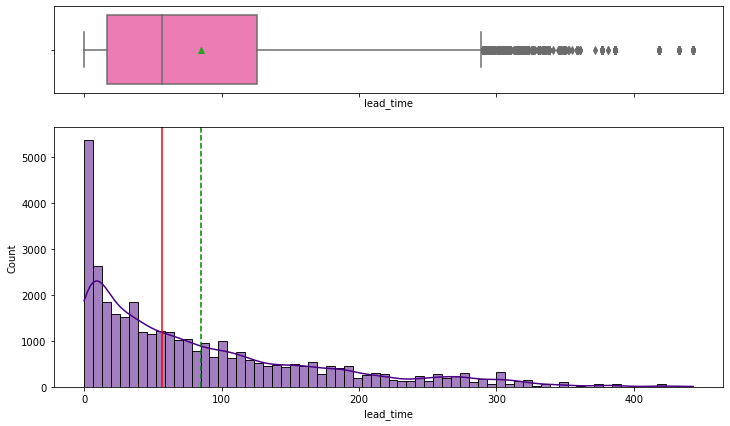

In [23]:
#Plot distribution of the no of weekend nights
boxplot_histogram(df,'lead_time',kde=True)

* Data is heavily right skewed with a good portion of data being above the mean
* Data has outliers. We will have a better idea if these are valid values after further analysis

#### Observation on `avg_price_per_room`

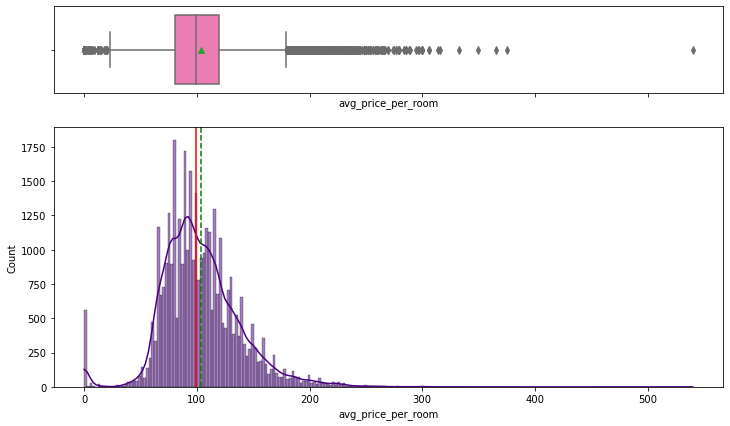

In [24]:
#Plot distribution of the no of weekend nights
boxplot_histogram(df,'avg_price_per_room',kde=True)

* Distribution of avg_price_per_room is close to a normal distribution
* Data has outliers. We will have a better idea if these are valid values after further analysis

#### Observation on `no_of_adults`

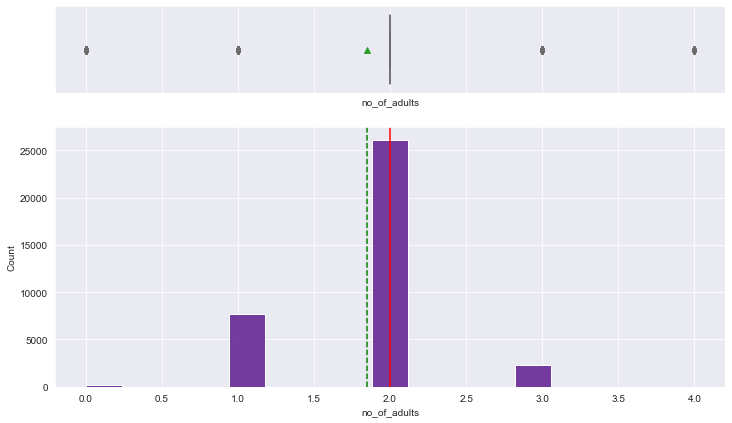

In [42]:
#Plot distribution of the no_of_adults
#labeled_barplot(df, 'no_of_adults', show_percent=True)
boxplot_histogram(df,'no_of_adults',kde=False)

* Majority of the rooms were booked for two people followed by 1 adult
* A very small portion of the room was booked for all children 
* The plot shows majority of the values as outliers. However, since the vriable is more discrete in nature and all of these values are valid, we will not treat these values as outliers

#### Observation on `no_of_children`

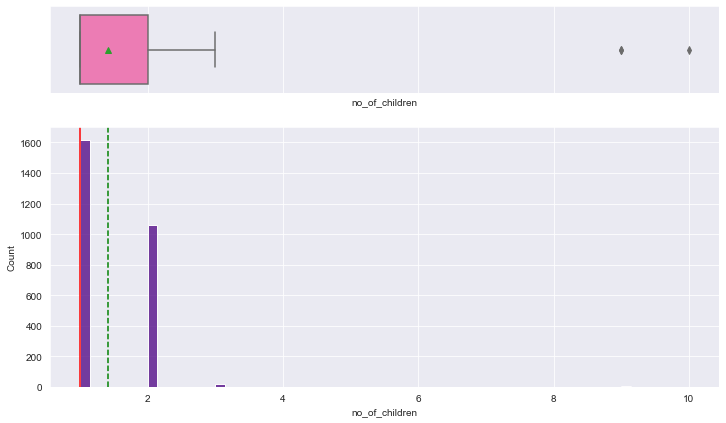

In [43]:
#Plot distribution of the no_of_children
#labeled_barplot(df, 'no_of_children', show_percent=True)
boxplot_histogram(df[df['no_of_children']>0],'no_of_children',kde=False)

* Majority of the rooms were booked for adults only
* The rooms that included children were mostly booked for one child followed by 2
* We have data point at 10, which is an un-usually large number of children to book a room for. 

Let's check all the unique values for no of children column

In [56]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

There are only 3 records with 10 and 9 children. This is clearly an outlier we would like to treat.

#### Observation on `no_of_weekend_nights`

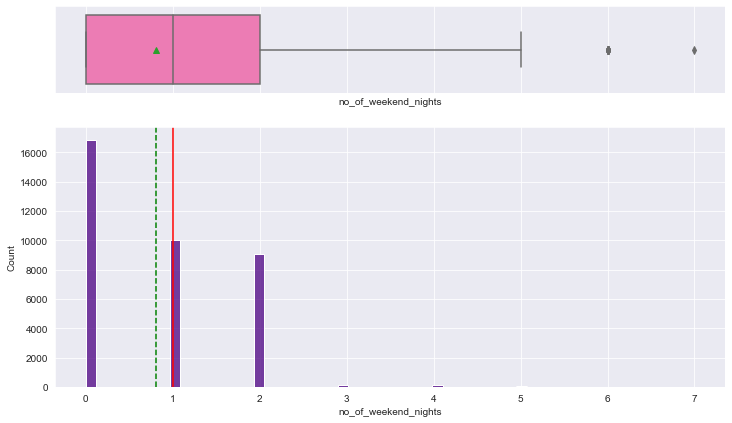

In [44]:
#Plot distribution of the no_of_weekend_nights
#labeled_barplot(df, 'no_of_weekend_nights', show_percent=True)
boxplot_histogram(df,'no_of_weekend_nights',kde=False)

* More than 50% of the booking included at least 1 weekend nights
* We see data points at 6 and 7 nights indicating booking for long stay. We would need further analysis to check if these values are outliers

#### Observation on `no_of_week_nights`

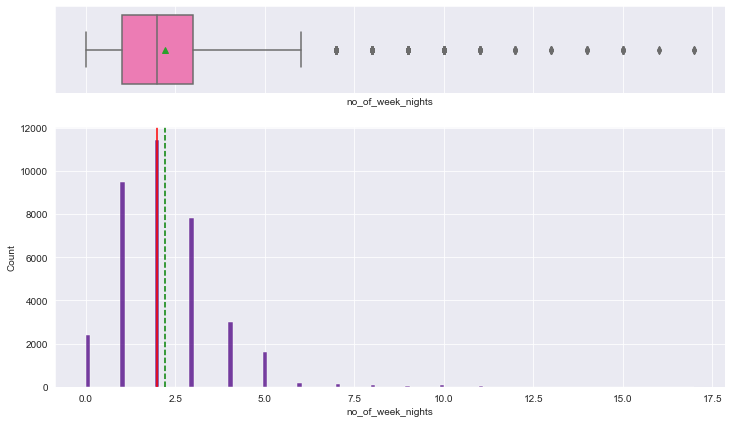

In [36]:
#Plot distribution of the no_of_week_nights
#labeled_barplot(df, 'no_of_week_nights', show_percent=True)
boxplot_histogram(df,'no_of_week_nights',kde=False)

* Majority of the booking was for less than a week's worth of stay. Very small percentage of the booking included more than two weeks worth of stay
* We see outliers in the data and would need further analysis to see if they are true outliers

#### Observation on `no_of_previous_cancellations`

From our initial observation of data, we noticed that majority of the booking didn't have guests who had previous cancellation. We will first generate a barplot to see what percentage of the bookings had guests with previous cancellation records

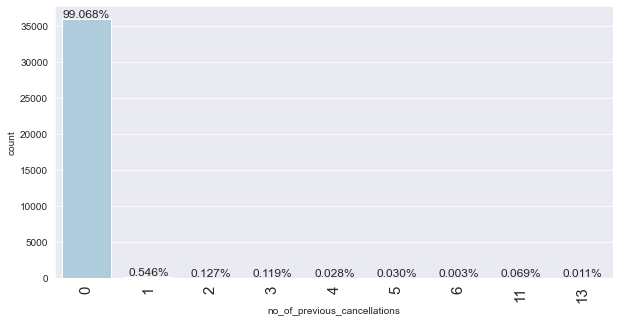

In [45]:
# Let's generate a bar plot for the no_of_previous_cancellations
labeled_barplot(df, 'no_of_previous_cancellations', show_percent=True)

* More than 99% of the booking had guests who never requested for a calcelation

Let's plot the distribution of the cancellation data for the guests who did have previous cancellation requests

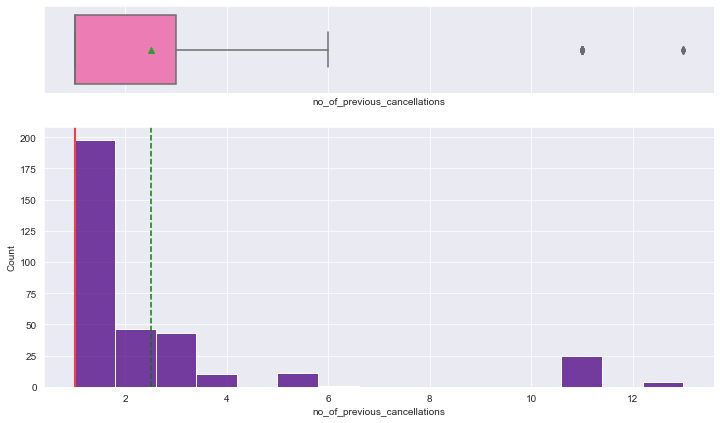

In [54]:
#Plot distribution of the no_of_previous_cancellations
boxplot_histogram(df[df['no_of_previous_cancellations'] > 0],'no_of_previous_cancellations',bins=15,kde=False)

* The data is right skewed and has outliers with some record having high number of previous cancellations

#### Observation on `no_of_previous_bookings_not_canceled`

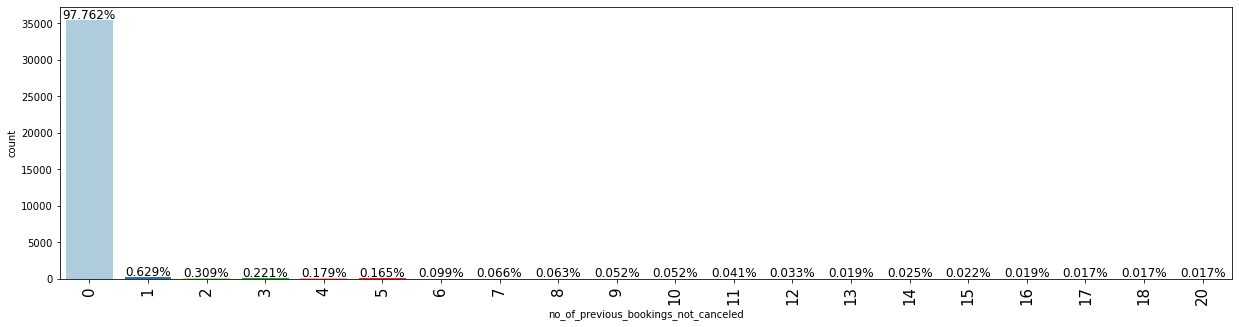

In [37]:
#Plot distribution of the no of weekend nights
labeled_barplot(df, 'no_of_previous_bookings_not_canceled', show_percent=True,top_n = 20)

* Almost 98% of the bookings were made by guests who never canceled a booking before


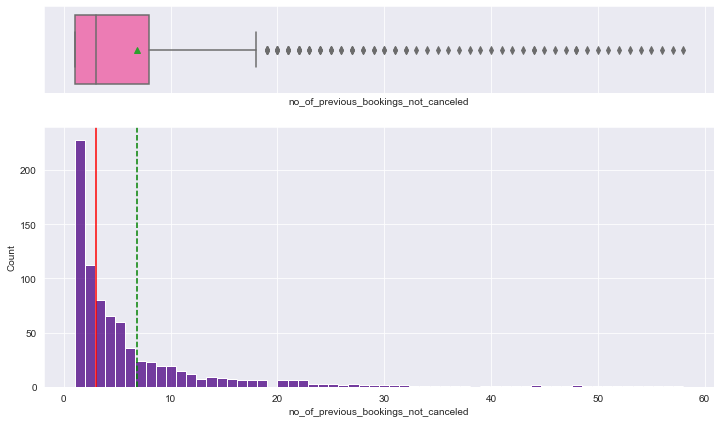

In [56]:
#Plot distribution of the no_of_previous_bookings_not_canceled for value greater than 0
boxplot_histogram(df[df['no_of_previous_bookings_not_canceled'] > 0],'no_of_previous_bookings_not_canceled',bins = 60,kde=False)

* Data has outliers

#### Observation on `no_of_special_requests`

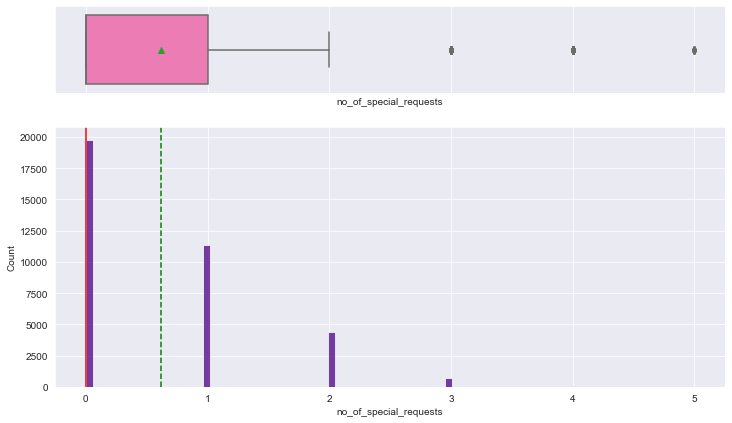

In [57]:
#Plot distribution of the no_of_special_requests
#labeled_barplot(df, 'no_of_special_requests', show_percent=True)
boxplot_histogram(df,'no_of_special_requests',kde=False)

* More than half of the bookings didn't make any special request followed by around 1 third booking asking for one special request
* We see outliers in the data. However they could be valid data and not an actual outlier

#### Observation on `required_car_parking_space`

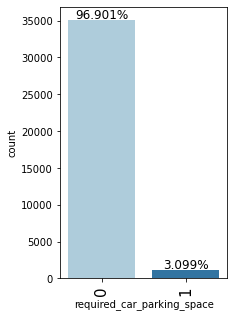

In [30]:
# Let's generate a bar plot for the required_car_parking_space
labeled_barplot(df, 'required_car_parking_space', show_percent=True)

* Only about 3% of the booking requested for a parking spot

#### Observation on `repeated_guest`

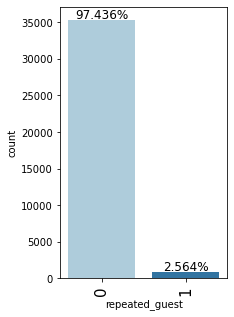

In [35]:
# Let's generate a bar plot for the repeated_guest
labeled_barplot(df, 'repeated_guest', show_percent=True)

* Around 97% of the guest were new visitor in the hotel. Only about 2.5% of the guests were a repeated visitor

#### Observation on `booking_status`

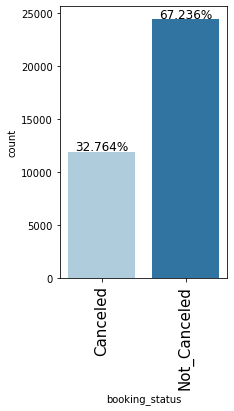

In [39]:
# Let's generate a bar plot for the booking_status
labeled_barplot(df, 'booking_status', show_percent=True)

* Dataset has more than double the data for Not_Canceled status than Canceled making the dataset imbalanced. 

#### Observation on `type_of_meal_plan` 

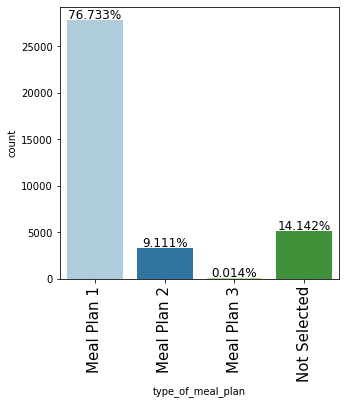

In [29]:
# Let's generate a bar plot for the type_of_meal_plan
labeled_barplot(df, 'type_of_meal_plan', show_percent=True)

* Over 85% of the booking had meal plan included

#### Observation on `room_type_reserved`

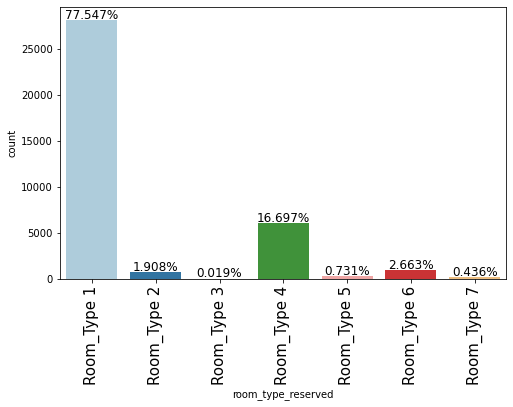

In [33]:
# Let's generate a bar plot for the room_type_reserved
labeled_barplot(df, 'room_type_reserved', show_percent=True)

* Majority of the booking requested for room type 1 followed by room type 4

#### Observation on `market_segment_type`

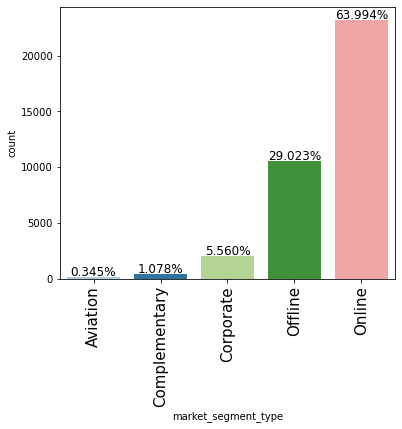

In [34]:
# Let's generate a bar plot for the market_segment_type
labeled_barplot(df, 'market_segment_type', show_percent=True)

* Almost 64% of the booking was made from Online platforms

#### Observation on `arrival_year`

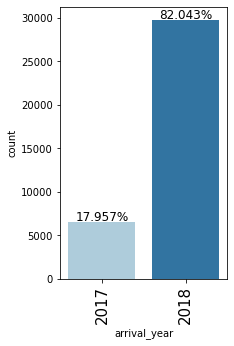

In [40]:
# Let's generate a bar plot for the arrival_year
labeled_barplot(df, 'arrival_year', show_percent=True)

* From our initial sanity check, we saw that the dataset only provided data for the later half of 2017, while for 2018 it contains data for all 12 months. This is visible from the bar plots as well since year 2017 only has 18% of the data
* Even though year 2017 had half the months of 2018 in the dataset, 2017 only contains 18% of the data, making us think that the Inn might have received less booking in 2017 compared to 2018

#### Observation on `arrival_month`

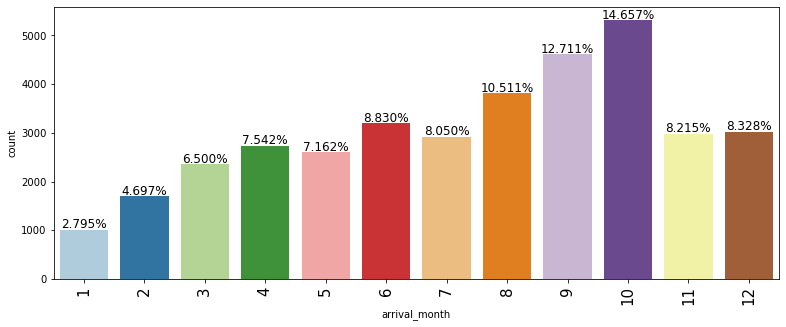

In [42]:
# Let's generate a bar plot for the arrival_month
labeled_barplot(df, 'arrival_month', show_percent=True)

* We see that the dataset has most booking data for the month of October followed by the month of September. However, as we do not have an equal number of months for both year, we would need further analysis of the data to come to a decision as to whether October and September are truly the most popular months for booking

#### Observation on `arrival_date`

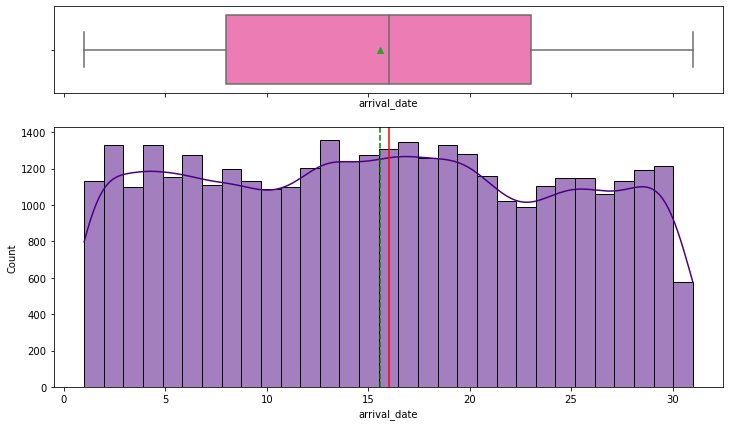

In [43]:
#Plot distribution of the no of arrival_date
boxplot_histogram(df,'arrival_date',kde=True,bins=31)

* From the plot we can see that the data is almost evenly distributed through out the month
* We do see a very slight uptick in booking in mid month

### Bivariate Analysis

#### Let's start with exploring the correlations between different variables
* We will drop the all the year, month and date coulmns from our correlation matrix as these are temporal data. 
* We will also transform the booking_status column to int value, in order to observe it's possible correlation with other variables. This will help us gain great insight into our target variable booking status.

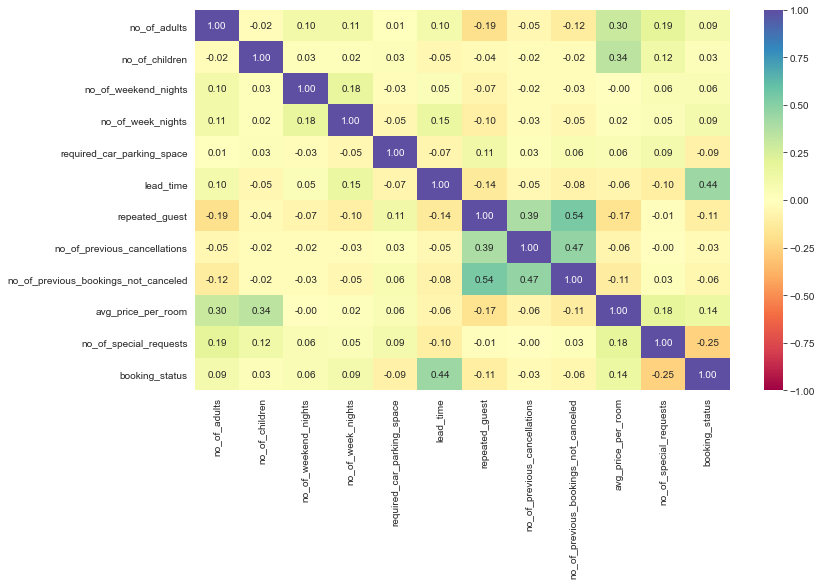

In [63]:
# Let's drop all the temporal coulmns from our correlation matrix 
df_corr = df.drop(['arrival_year','arrival_month','arrival_date'],axis=1)
# Let's also convert the booking_status column to int value by assigning Cancelled to 1 and Not_cancelled to 0
df_corr["booking_status"] = df_corr["booking_status"].apply(lambda x: 1 if x == 'Canceled' else 0).astype('int64')

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* We see significant correlation between booking status and lead time. The higher the lead time is, the higher the chance of cancellation becomes
* We also see slight correlation between booking status and average price per room. The higher the price is, the higher the chance of cancellation becomes
* Booking status has negative correlation with a few other variables that are worth considering. The chance of cancellation goes down with the increase in number of special requests
* Booking status is also negatively correlated with repeated_guest and number of previous cancellation. Repeated guests have less chance of canceling. Anyone requesting for a parking space also has slightly less chance of cancellation


* Average price per room has slight positive correlation with no of special request made and number of guests in the room
* Average price per room is negatively correlated with repeated guest indicating the possibility that returning guests are being offered some discount


* Repeated guests column is also negatively correlated with lead time and no of adults
* Lead time is positively correlated to number of week nights. It would make sense in the context that pre-planned vacations booked ahead of time would include more week night stays
* We see a correlation between the no of cancellation columns. This is expected as combining these two numbers will give us the number of times a guest stayed in the hotel before

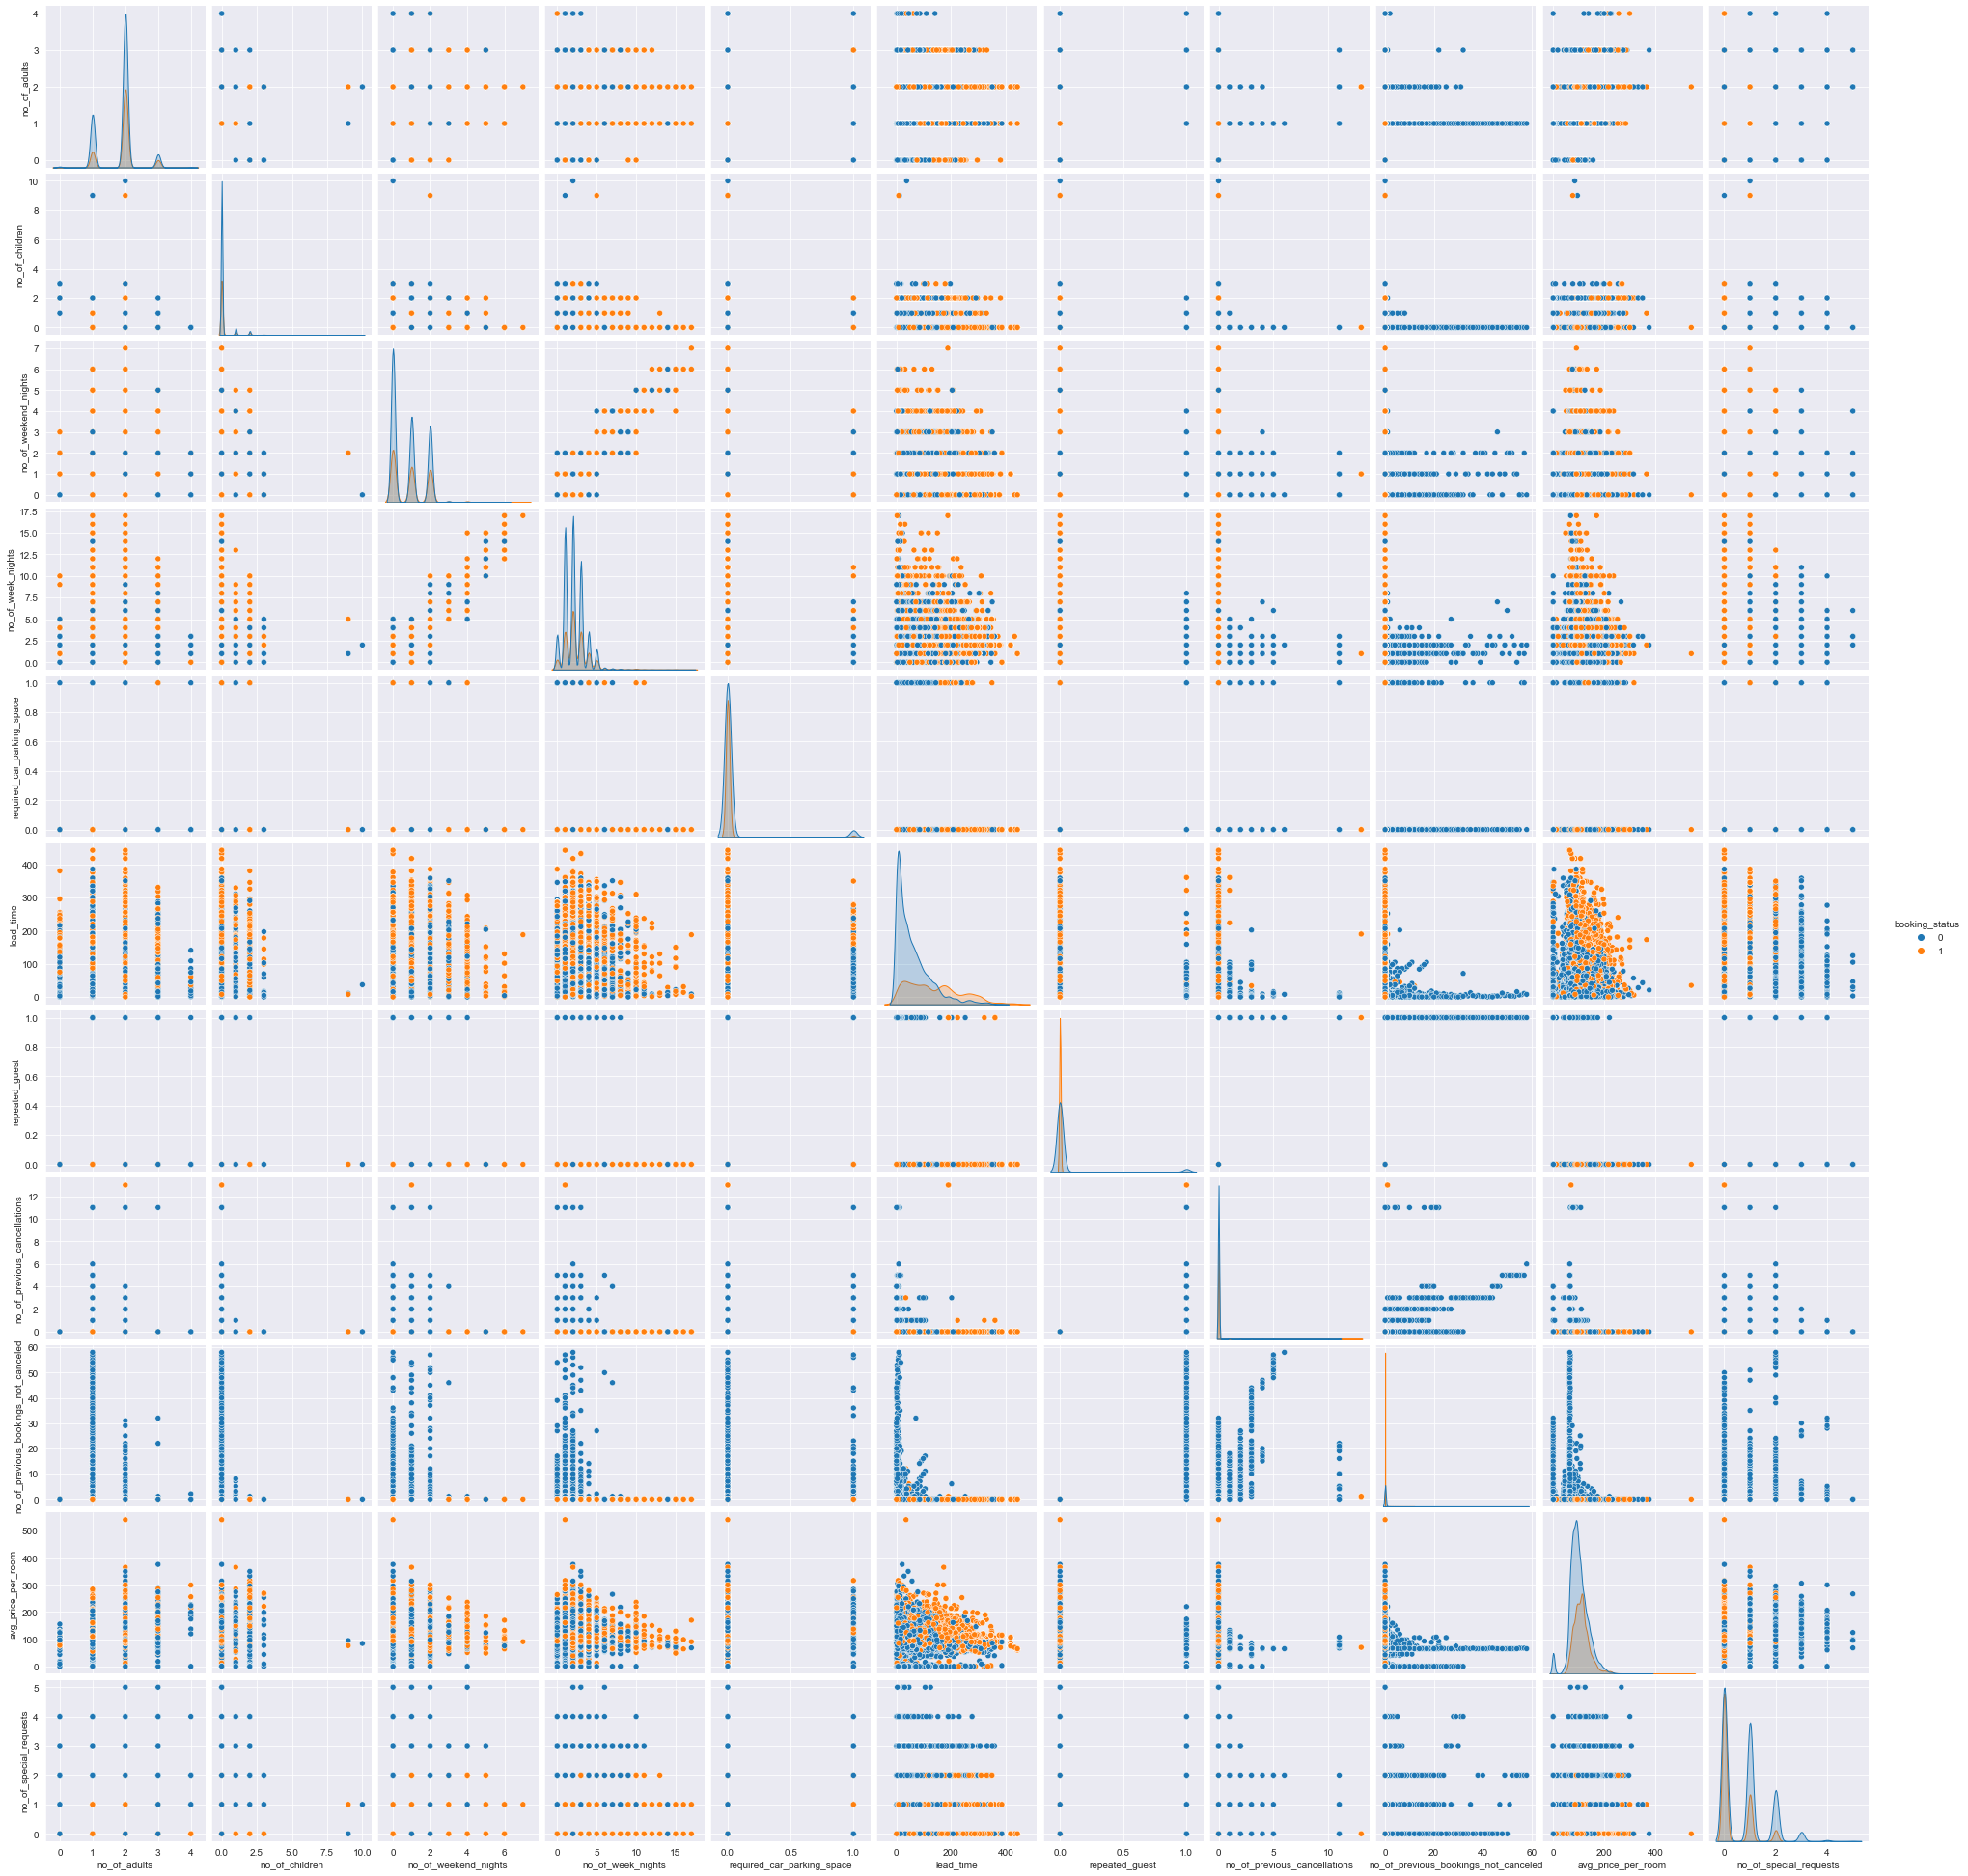

In [64]:
# Let's quickly check the pair plot to see if we can identify any pattern between different variables
temp_df = df.copy()
temp_df = temp_df.drop(columns=['required_car_parking_space','repeated_guest','arrival_year'])
sns.pairplot(df_corr,hue='booking_status') 

* Number of week nights and weekend nights have linear relationship
* No other variables are displaying any useful patterns

**What are the busiest months in the hotel?**

Let's plot and compare the booking distribution over the months for the year 2017 and 2018

<AxesSubplot:xlabel='arrival_month', ylabel='Count'>

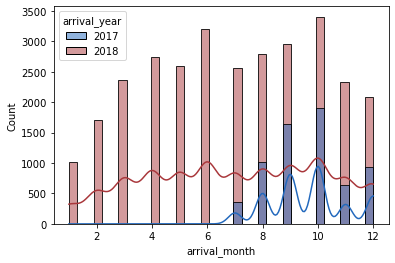

In [46]:
# Let's plot the distribution of the months separately for the two years
sns.histplot(data=df, x='arrival_month', hue = 'arrival_year', kde=True, palette='vlag')

* We see that for both 2017 and 2018, the highest number of booking was placed in the month of October. 
* The second highest number of booking was in the month of June in year 2018. We do not have data for June 2017. However, the thrid highest booking for year 2018 was September, which is consistent with the data for 2017, where September received the second highest booking

**Which market segment do most of the guests come from?**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


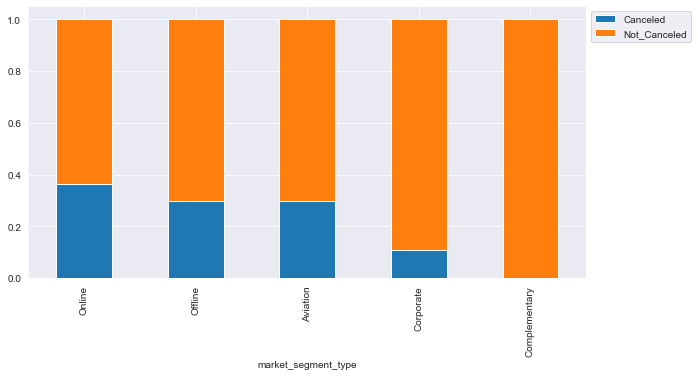

In [100]:
# Let's generate a bar plot for the market_segment_type
#labeled_barplot(df, 'market_segment_type',show_percent=True)
stacked_barplot(df, "market_segment_type", "booking_status")

* None of the complimentary rooms were cancelled by a customer
* Very small portion of the Corporate customers end up cancelling their booking
* Most of the cancellation comes from the Online platform


One of the important consideration while booking a vacation is always budget. Let's explore how the price varies between different booking options provided to the customer. 

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

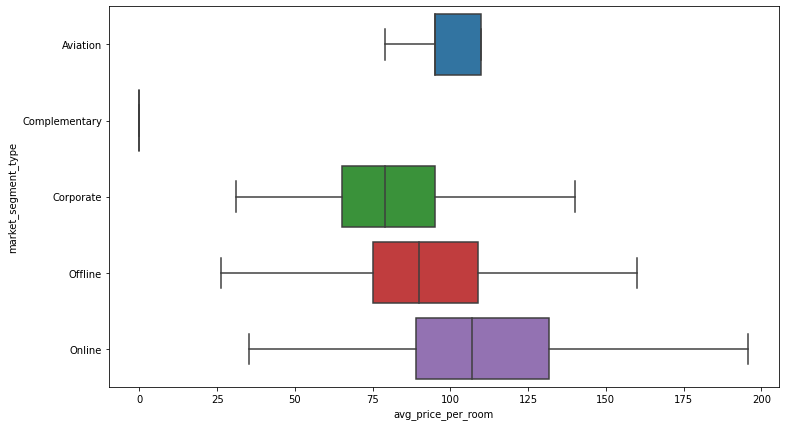

In [49]:
# lets see how average price per room varies accross different market segment 
plt.figure(figsize=(12, 7))
sns.boxplot(y="market_segment_type", x="avg_price_per_room", data=df, showfliers=False)
plt.show()

* Online platform has higher average price per room than any other platform
* We see a market_segment_type complimentary which explains why there are some bookings with 0 price per room
* Market segment Corporate has the lower average price per room which indicates deals offered by the Inn to corporate customers
* Also none of the market segment has any outliers when it comes to ave. price per room

**What percentage of bookings are canceled?**

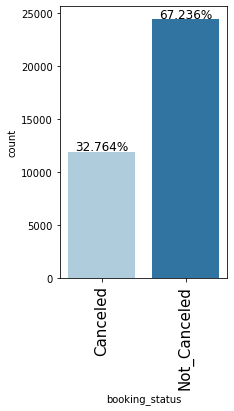

In [50]:
# Let's generate a bar plot for the booking_status
labeled_barplot(df, 'booking_status', show_percent=True)

* 67% of the booking data provided had a Not_Canceled status while almost 33% had a status of canceled

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


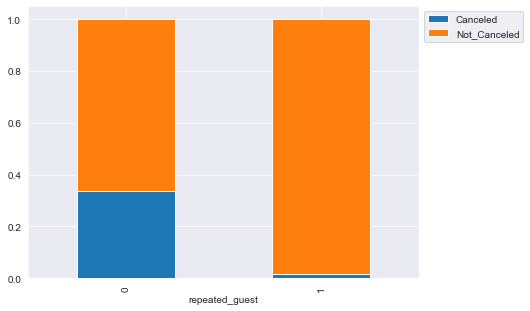

In [85]:
# Let's generate a bar plot for the booking_status for 
#labeled_barplot(df[df['repeated_guest']==1], 'booking_status', show_percent=True)
stacked_barplot(df, "repeated_guest", "booking_status")

**Observation**
* Repeating guests has around 1.7% cancellation rate as opposed to new guests, who has a 33% cancelation rate. 
* This big difference in cancellation indicates customers who stayed at the Inn previously are more confident in their choice of booking than a guest who is new

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

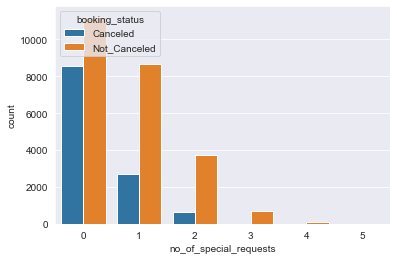

In [101]:
# Let's plot the frequency of cancellation for different number of 
sns.countplot(x='no_of_special_requests',hue='booking_status',data=df)

**Observation**
* Majority of the cancellation requests came from customers who did not make any special request
* Customers who makes higher number of special request has less chance of cancelling the booking as we can clearly see the number of special request going down quickly with as the number of special request goes up

**How does the lead time vary accross different time of the year ?** 

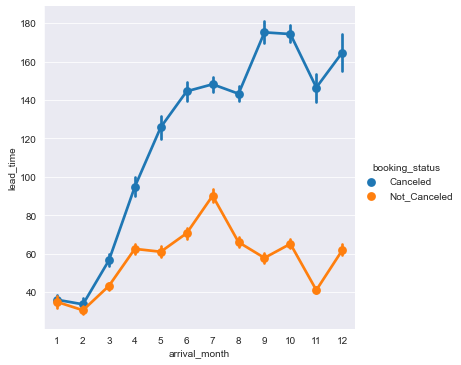

In [121]:
# Let's explore how lead time varies over different time of the year for both cancelled and not cancelled bookings
sns.catplot(y="lead_time", x='arrival_month', hue="booking_status", kind="point", data=df)

**Observation**
* We see the lead time significantly drop for the Not cancelled booking compared to cancelled booking
* The distribution however follow a similar pattern for both the booking status as the lead time significantly drop during the winter month and peaks during the warmer period of time

**How does price per room vary against lead time ?**

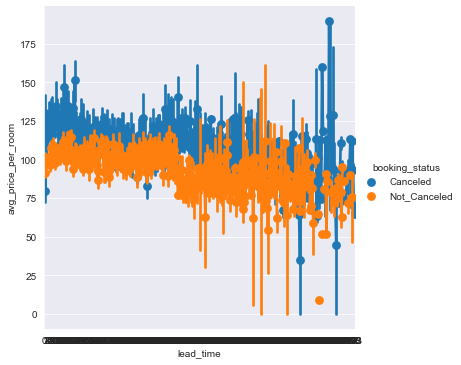

In [112]:
# Let's plot lead time vs avg_price_per_room for both cancelled and not cancelled bookings
sns.catplot(y="avg_price_per_room", x='lead_time', hue="booking_status", kind="point", data=df)

* The price drops in general as the lead time increases. However, we see much higher price for cancelled booking compared to the not cancelled booking
* This indicates that, customers who book ahead of time with a high price point will be at a higher risk of cancellation as if they can find a better deal somewhere else they will go for that deal

## Data Preprocessing

- **Missing value treatment:** From our observation, we know that the dataset has no missing values
- **Feature engineering:** Most of the variables in this datset are numerical and the categorical variables come with important information. Therefore, In this specific case, we would refrain from trasnforming any of the columns as we would like to leverage all the variables provided in our model and let the model decide which variable is important
- **Outlier detection and treatment:** We will check for outliers and treat them if needed
- **Preparing data for modeling** 
- **Any other preprocessing steps**

### Outlier detection and treatment

Let's create the funciton that will assign all the smaller than Lower_Whisker will be assigned the value of Lower_Whisker and greater than Upper_Whisker will be assigned the value of Upper_Whisker

In [90]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [91]:
# Get a list of all numerical columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [92]:
#Drop the two columns which are flags: required_car_parking_space and repeated_guest as well as all the temporal data
numerical_col = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
numerical_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

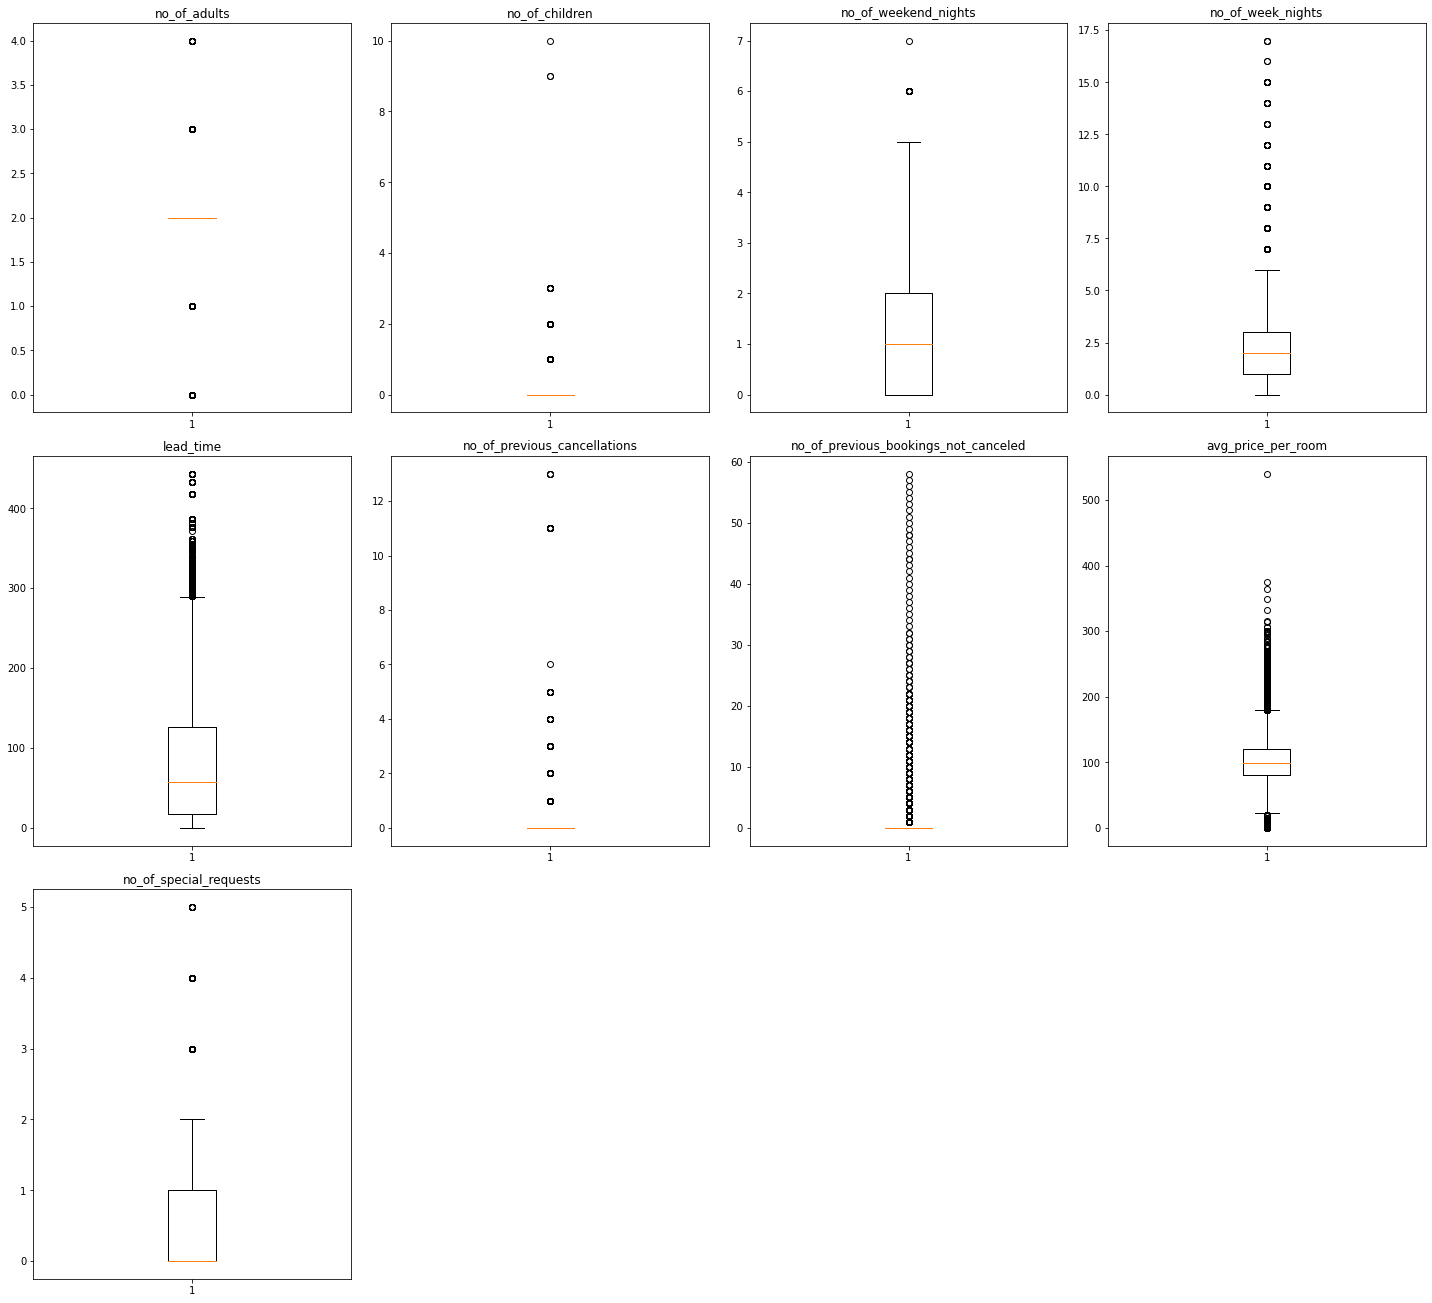

In [93]:
# let's look at box plots for the selected numerical columns to see which columns have outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**From our EDA, we observed that 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',  'no_of_week_nights' columns do not have a lot of variance in their values. Let's check the number of unique values for these to help us better understand the outliers**

In [94]:
#Let's list the number of unique values for no of children grouped by the no of adults
no_guest = pd.crosstab(df.no_of_adults,df.no_of_children)
no_guest

no_of_children     0     1    2   3   9   10
no_of_adults                                
0                   0     1  133   5   0   0
1                7551    90   53   0   1   0
2               23719  1502  871  14   1   1
3                2291    25    1   0   0   0
4                  16     0    0   0   0   0

* Maximum number of adult is 4 and there are 16 records for it, which is reasonable
* There are only 2 records for no of children over 3. These are clearly outliers and we will assign a value of 3 for these records

In [95]:
#Replace the two outliers for no of children with maximum value before them
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

In [96]:
#Let's list the number of unique values for no of week nights grouped by the no of weekend nights
no_stay = pd.crosstab(df.no_of_weekend_nights,df.no_of_week_nights)
no_stay

no_of_week_nights       0     1     2     3     4    5    6   7   8   9   10  \
no_of_weekend_nights                                                           
0                       78  5082  5745  4180  1529  258    0   0   0   0   0   
1                     1522  1940  3406  2071   743  313    0   0   0   0   0   
2                      787  2466  2293  1588   718  973  126  63  38  14   5   
3                        0     0     0     0     0   53   31  39  14   9   7   
4                        0     0     0     0     0   17   32  11  10  11  32   
5                        0     0     0     0     0    0    0   0   0   0  18   
6                        0     0     0     0     0    0    0   0   0   0   0   
7                        0     0     0     0     0    0    0   0   0   0   0   

no_of_week_nights     11  12  13  14  15  16  17  
no_of_weekend_nights                              
0                      0   0   0   0   0   0   0  
1                      0   0   0   0   0   0   0  
2                      0   0   0   0   0   0   0  
3                      0   0   0   0   0   0   0  
4                     13   2   0   0   1   0   0  
5                      4   5   1   1   5   0   0  
6                      0   2   4   6   4   2   2  
7                      0   0   0   0   0   0   1

* The number of weekends and weeknights matches. We see there are very few records with high total number lenght of stay. However, the number of days steadily incraese, indicating that these are valid values

**Observation**
* no_of_special_request, no_of_previous_cancellations and no_of_previous_bookings_not_canceled has values that are technically outliers. However, the values seem valid given the context and we will not treat them for outliers 
* From our EDA, we saw a correlation between high price point, cancellation and lead time. Therefore, we will not treat these three columns for outliers either as we want to capture this information in our model

### Data Preparation

**Drop the columns we will not be using in the modeling**
* The columns arrival year doesn't really have any significance in terms of cancellation. And even it does, it is not an information that will be available ahead of time and would lead to target leakage. Therefore we will drop this column from the dataset.

In [97]:
df = df.drop(columns=['arrival_year']) 

**Transform the target variable**

**Encoding cancelled and not_calcelled booking status as 1 and 0**

In [98]:
#Map Canceled status to 1 and Not_Cancelled status to 0 for the Booking status column
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == 'Canceled' else 0).astype('int64')
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  
0               65.00                       0               0  
1              106.68                       1               0  
2               60.00                       0               1  
3              100.00                       0               1  
4               94.50                       0               1

In [99]:
#Let's check if the number of cancelled and not cancelled is still the same
df["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [100]:
# Let's do a quick check of all the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_month                         36275 non-null  int64   
 9   arrival_date                          36275 non-null  int64   
 10  market_segment_type                   36275 non-null  category
 11  re

## EDA

- It is a good idea to explore the data once again after manipulating it.

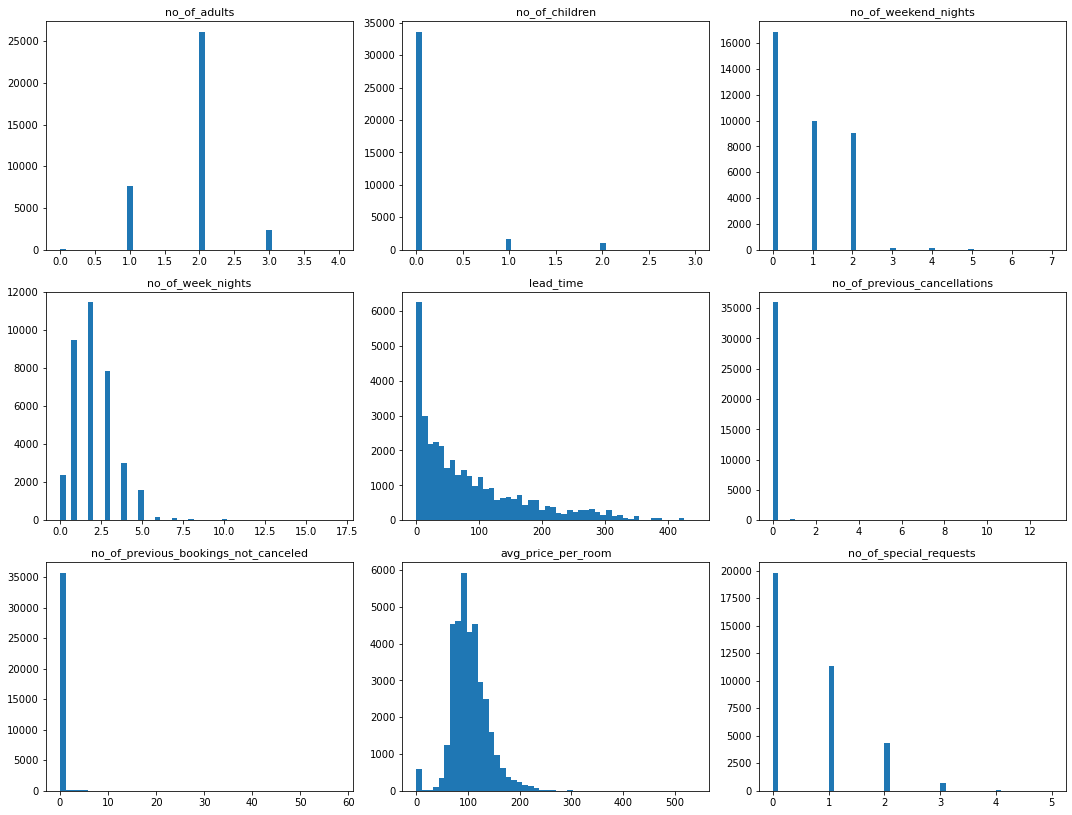

In [101]:
# creating a list of non-tag columns
dist_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time'
             ,'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=11)

plt.show()

**Observation**
* We can see the number of children column no longer has any value greater than 3
* Rest of the distribution remains the same as expected

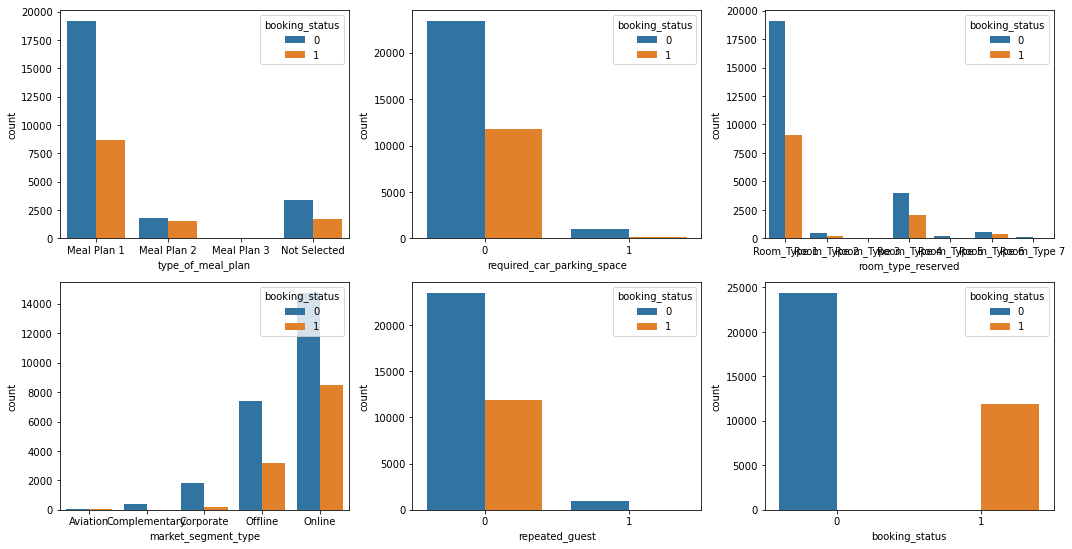

In [102]:
# creating a list of non-tag columns
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type'
             ,'repeated_guest','booking_status']  #,'time_of_year'

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))
i = 0
for i in range(len(cat_cols)):
    plt.subplot(12, 3, i + 1)
    sns.countplot(df[cat_cols[i]],hue=df['booking_status'])
    plt.tight_layout()

plt.show()

**Observation**
* Distribution of categorical variables remain the same as expected

## Summary of EDA

##### **Data Description:**

* Dependent variable is the booking_status which is of categorical data type
* Dataset comes with a lot of numerical variables which we will keep for our models
* no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests numeric type while other variables are of categorical type
* arrival_year, arrival_month, arrival_date even though of numerical type, are actually temporal data
* There are no missing values in the dataset.

**Data Cleaning:**

* We updated no of children column and updated two extreme outlier records 9 and 10 to be the last maximum number 3
* We also dropped the arrival_year column as this provides us with no value and can possibly lead to target leakage
* Rest of the data didn't require much cleaning. Most of the columns had numerical data. The outlier values were valid and categorical values had enough information to provide us with possible insights 

**Observations from EDA:**

* `no_of_adults` and `no_of_children`: Majority of the rooms were booked for two adults. There were a few booking that only included children. But majority of the room with children had two addults in it
* `no_of_week_nights` and `no_of_weekend_nights`: Majority of the bookings are for less than a weeks time. There were very few bookings that was for more than 3 weeks
* `type_of_meal_plan`: 85% of the data included meal plan. About 77% choose Meal Type 1
* `required_car_parking_space`: 97% of the booking didn't not request for a parking space
* `room_type_reserved`: Most popular room is Room Type 1, followed by room type 4
* `lead_time` vs `booking_status`: There is a clear positive correlation between lead time and booking status. The chance of a booking being cancelled goes up with the lead time
* `arrival_year`, `arrival_month` and `arrival_date`: We received data for Jule 1, 2017 to December 31st, 2018. The booking peaks around September/October timeframe and is lowest around winter time. This pattern is visible for both years. The booking distribution accross all the dates of a month is pretty even with slight peak in the middle
* `market_segment_type`: 63% of the booking was placed through Online platform. Majority of the cancellation was requested for rooms booked online. Corporate booking has the least percentage of cancellation. None of the complimentary bookings were ever cancelled
* `market_segment_type` vs `avg_price_per_room` : The price is highest on average on online platforms which is also positively correlated with booking status 
* `repeated_guest`: Repeated guests has less chance of cancelling booking compared to new guests
* `no_of_previous_cancellations`and `no_of_previous_bookings_not_canceled`: Certain guests has high number of previous cancellation record indicating that the INN hotel has some regular customers
* `avg_price_per_room` and `lead_time`: The average price per room is correlated with booking status and lead time. The price goes down as the lead time goes up. However, for the cancelled booking, the some prices are heavily right skewed
* `no_of_special_requests`: Majority of the booking made no special requests. Among the bookings that contained special request, majority opted to not cancel their booking
* `booking_status`: This is our target variable. 68% of the data has a booking status of Not Cancelled as opposed to 32% Cancelled. This makes the data imbalanced and we will need to assign appropriate weight while building the model


## Building a Logistic Regression model

**Creating training and test sets**

In [115]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant 
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [116]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting customer will cancel but in reality shows up will do some serious damage to the brand reputation.
2. Predicting customer will not cancel but in reality does will cause the Inn to have loss of revenue and resources.

### Which case is more important? 
* Both the cases are important as:

* If we predict a customer will cancel but in reality shows up, the Inn might not be able to provide them with the room they requested which will cause serious inconvenience to the customer and in turn do major damage to the brand.

* If we predict a customer will not cancel but in reality does, the Inn will have to spend additional resources trying to put it back into the market and get new customer on time and sometime even loose revenue if they are not able to find new customer on time.


### How to reduce this loss ?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [108]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

- We will now perform logistic regression using statsmodels
- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [117]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3274
Time:                        00:20:48   Log-Likelihood:                -10823.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.4341      0.264     -9.214      0.000      -2.952      -1.916
no_of_adults                             0.1015      

In [118]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0    0.8036  0.626211   0.737813  0.677446

**Observations** 

- Negative values of the coefficient shows that probability of customer cancelling decreases with the increase of corresponding attribute value

- Positive values of the coefficient show that that probability of customer not cancelling increases with the increase of corresponding attribute value

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant

- But these variables might contain multicollinearity, which will affect the p-values.


* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* We will use the Variation Inflation Factor to detect and treat multi-collinearity

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [119]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   329.511086
no_of_adults                              1.349288
no_of_children                            2.092131
no_of_weekend_nights                      1.068134
no_of_week_nights                         1.095645
required_car_parking_space                1.039743
lead_time                                 1.246317
arrival_month                             1.053684
arrival_date                              1.006786
repeated_guest                            1.781344
no_of_previous_cancellations              1.394568
no_of_previous_bookings_not_canceled      1.647300
avg_price_per_room                        1.941235
no_of_special_requests                    1.246047
type_of_meal_plan_Meal Plan 2             1.203582
type_of_meal_plan_Meal Plan 3             1.025254
type_of_meal_plan_Not Selected            1.237100
room_type_reserved_Room_Type 2            1.105055
room_type_reserved_Room_Type 3            1.003

* For any variable with VIF greater than 5, we say there is a moderate VIF and for VIF greater than 10, it shows signs of high multi-colinearity. 
* We will start by dropping the variable with the highest VIF, market_segment_type_Online and calculate again

In [120]:
# Drop the market_segment_type_Online from our training data
X_train1 = X_train.drop(["market_segment_type_Online"], axis=1,)

In [121]:
# Calculate VIF for the remaining columns
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   41.772848
no_of_adults                             1.332383
no_of_children                           2.091180
no_of_weekend_nights                     1.067630
no_of_week_nights                        1.095109
required_car_parking_space               1.039622
lead_time                                1.243874
arrival_month                            1.053520
arrival_date                             1.006770
repeated_guest                           1.777785
no_of_previous_cancellations             1.394280
no_of_previous_bookings_not_canceled     1.647139
avg_price_per_room                       1.941030
no_of_special_requests                   1.241453
type_of_meal_plan_Meal Plan 2            1.203519
type_of_meal_plan_Meal Plan 3            1.025254
type_of_meal_plan_Not Selected           1.235893
room_type_reserved_Room_Type 2           1.104868
room_type_reserved_Room_Type 3           1.003235
room_type_reser

* X_train1 no longer has any column with high collinearity

In [122]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3273
Time:                        00:21:17   Log-Likelihood:                -10824.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9064      0.113    -25.699      0.000      -3.128      -2.685
no_of_adults                             0.0922      

In [123]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0    0.8036  0.626211   0.737813  0.677446

**Observations**

- We have removed all variables with multi-collinearity. However, that did not cause any significant improvement in model performance

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.


In [124]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [125]:
#Only select features with low p-values
X_train2 = X_train1[selected_features]

In [126]:
# fitting logistic regression model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3264
Time:                        00:23:27   Log-Likelihood:                -10839.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.9593      0.107    -27.585      0.000      -3.170      -2.749
no_of_adults                       0.0959      0.037      2.572      0.

* Now no feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final ones and lg2 as final model.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [127]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.051855      1.100604        1.177401              1.116635   
Change_odd% -94.814522     10.060372       17.740132             11.663527   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.043163                    0.197648   1.016409   
Change_odd%           4.316254                  -80.235235   1.640937   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds              0.939779        0.066922                      1.254883   
Change_odd%      -6.022054      -93.307817                     25.488327   

             avg_price_per_room  no_of_special_requests  \
Odds                   1.020768                0.233123   
Change_odd%            2.076827              -76.687698   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.417992                        0.688726   
Change_odd%                       41.799234                      -31.127396   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.770176                        0.494771   
Change_odd%                      -22.982402                      -50.522934   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.348791                        0.221915   
Change_odd%                      -65.120904                      -77.808462   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.444949                     0.163026  
Change_odd%                     -55.505101                   -83.697376

### Coefficient interpretations  

* `lead_time`: Holding all other features constant a 1 unit change in lead_time will increase the odds of a booking being cancelled by 1.6%
* `arrival_month`: Holding all other features constant a 1 unit change in the arrival_month will decrease the odds of a booking being cancelled by 6%
* `repeated_guest`: Holding all other features constant if the booking is for a repeated_guest, it will decrease the odds of a booking being cancelled by 93.3%
* `avg_price_per_room` : Holding all other features constant a 1 unit change in avg_price_per_room will increase the odds of a booking being cancelled by 2.07%
* Holding all other features constant the odds of a booking being cancelled decreases by 55.5% and 83.69 percent for Corporate customers and Offline bookings respectively
* room_type_reserved_Room_Type 2, 4, 5, 6 and 7, all decreases the odds of booking being cancelled by 30 to 77 percent
* `type_of_meal_plan_Not Selected`: Holding all other features constant if the booking doesn't include a meal plan, it increase the odds of a booking being cancelled by almost 42%
* `required_car_parking_space` : If the booking includes request for parking, the odds of it being cancelled decreases by 80%
* `no_of_special_requests` : Holding all other features constant a 1 unit change in no_of_special_requests will decrease the odds of a booking being cancelled by 76.7%

`Number of guests and Lenght of stay all increases the odds of cancellation. Interpretation for other attributes can be done similarly.`

## Model performance evaluation

#### Checking model performance on the training set

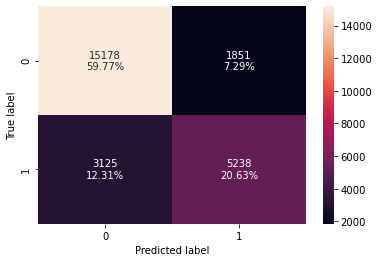

In [129]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [130]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy   Recall  Precision       F1
0  0.804033  0.62633   0.738891  0.67797

#### ROC-AUC
* ROC-AUC on training set

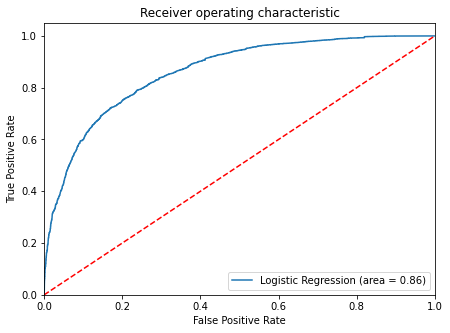

In [131]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [132]:
X_test2 = X_test[X_train2.columns].astype(float)

**Using model with default threshold**

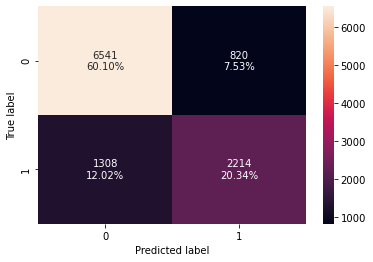

In [133]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [134]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy   Recall  Precision        F1
0  0.804466  0.62862    0.72973  0.675412

* ROC curve on test set

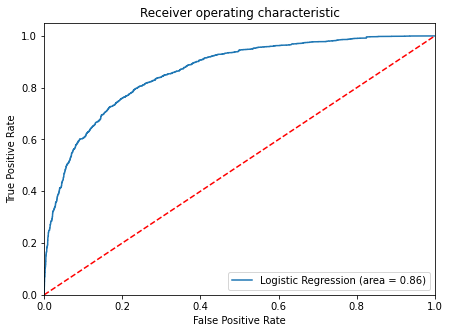

In [135]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observation**
* The performance on train and test set are incredibly close
* Also the AUC-ROC score is of .86 is excellent 

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [136]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3090087010922043


#### Checking model performance on training set

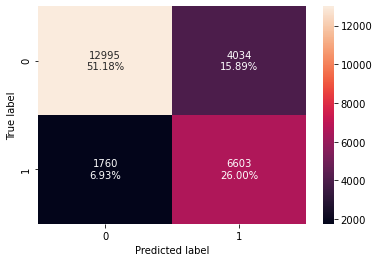

In [137]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [138]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.771818  0.789549   0.620758  0.695053

* Recall has increased from .62 to .78 while the Precision of model has decreased from .73 to .62 
* The F1 score, which we care about the most went up from .67 to .69
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

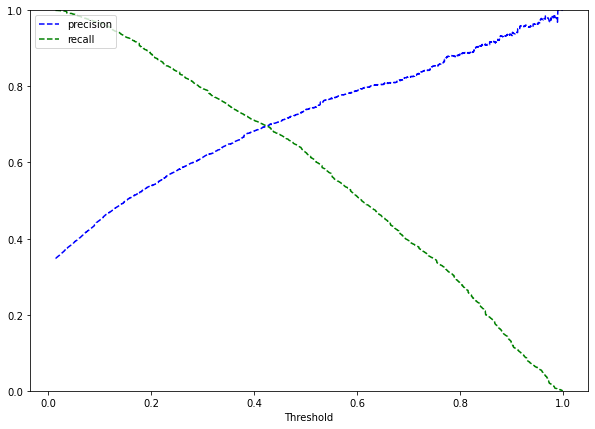

In [139]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.41, we get balanced recall and precision.

In [146]:
# setting the threshold
optimal_threshold_curve = 0.41

#### Checking model performance on training set

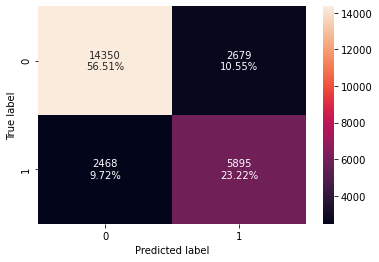

In [147]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [148]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.797298  0.704891   0.687544  0.696109

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.41 as the optimal threshold.

### Let's check the performance on the test set

**Using model with default threshold**

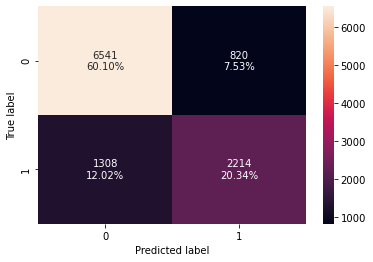

In [149]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [150]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy   Recall  Precision        F1
0  0.804466  0.62862    0.72973  0.675412

* ROC curve on test set

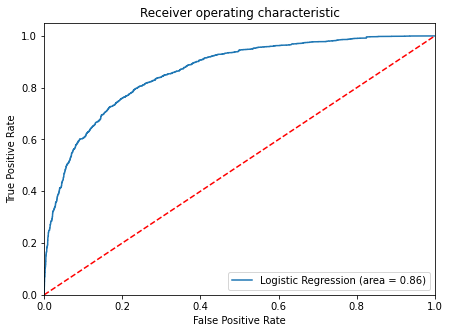

In [151]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

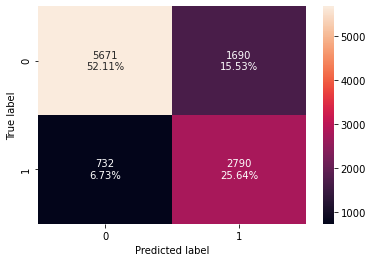

In [152]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [153]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.777451  0.792164   0.622768  0.697326

**Using model with threshold = 0.41**

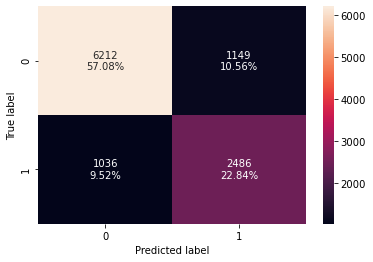

In [154]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [155]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.799228  0.705849   0.683906  0.694704

## Final Model Summary

In [156]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.23 Threshold  \
Accuracy                         0.804033                            0.771818   
Recall                           0.626330                            0.789549   
Precision                        0.738891                            0.620758   
F1                               0.677970                            0.695053   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.797298  
Recall                               0.704891  
Precision                            0.687544  
F1                                   0.696109

In [157]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                         0.804466                            0.777451   
Recall                           0.628620                            0.792164   
Precision                        0.729730                            0.622768   
F1                               0.675412                            0.697326   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.799228  
Recall                               0.705849  
Precision                            0.683906  
F1                                   0.694704

**Observation**
* The performance in both the train and test data are very close
* THe F1 score of ~.69 is acceptable

## Building a Decision Tree model

### Data Preparation

In [252]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(25392, 26) (10883, 26)


In [253]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [254]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [164]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [165]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* Based on our previous observations, the datset provided is imbalanced with 68% data being for not cancelled and 32% data are for Cancelled status. As the frequency of not cancelled is 2/3 of cancelled, booking status not cancelled will become the dominant class and the decision tree will become biased toward the dominant classes.
* In this case, we can pass a dictionary {0:0.32,1:0.68} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
* class_weight is a hyperparameter for the decision tree classifier.

In [179]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.32, 1: 0.68}, random_state=1
)

In [180]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68}, random_state=1)

#### Checking model performance on training set

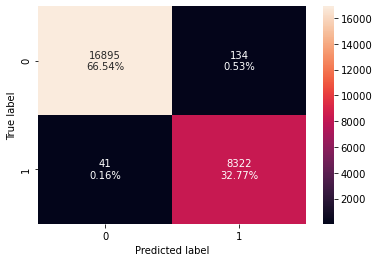

In [181]:
confusion_matrix_sklearn(model, X_train, y_train)

In [182]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.993108  0.995097   0.984153  0.989595

* Model is able to almost perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

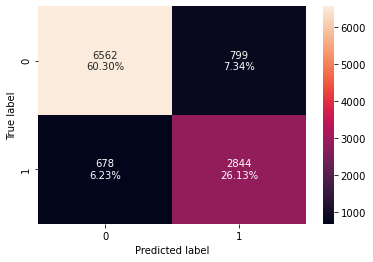

In [183]:
confusion_matrix_sklearn(model, X_test, y_test)

In [184]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.864284  0.807496   0.780675  0.793859

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [185]:
## creating a list of column names
feature_names = X_train.columns.to_list()

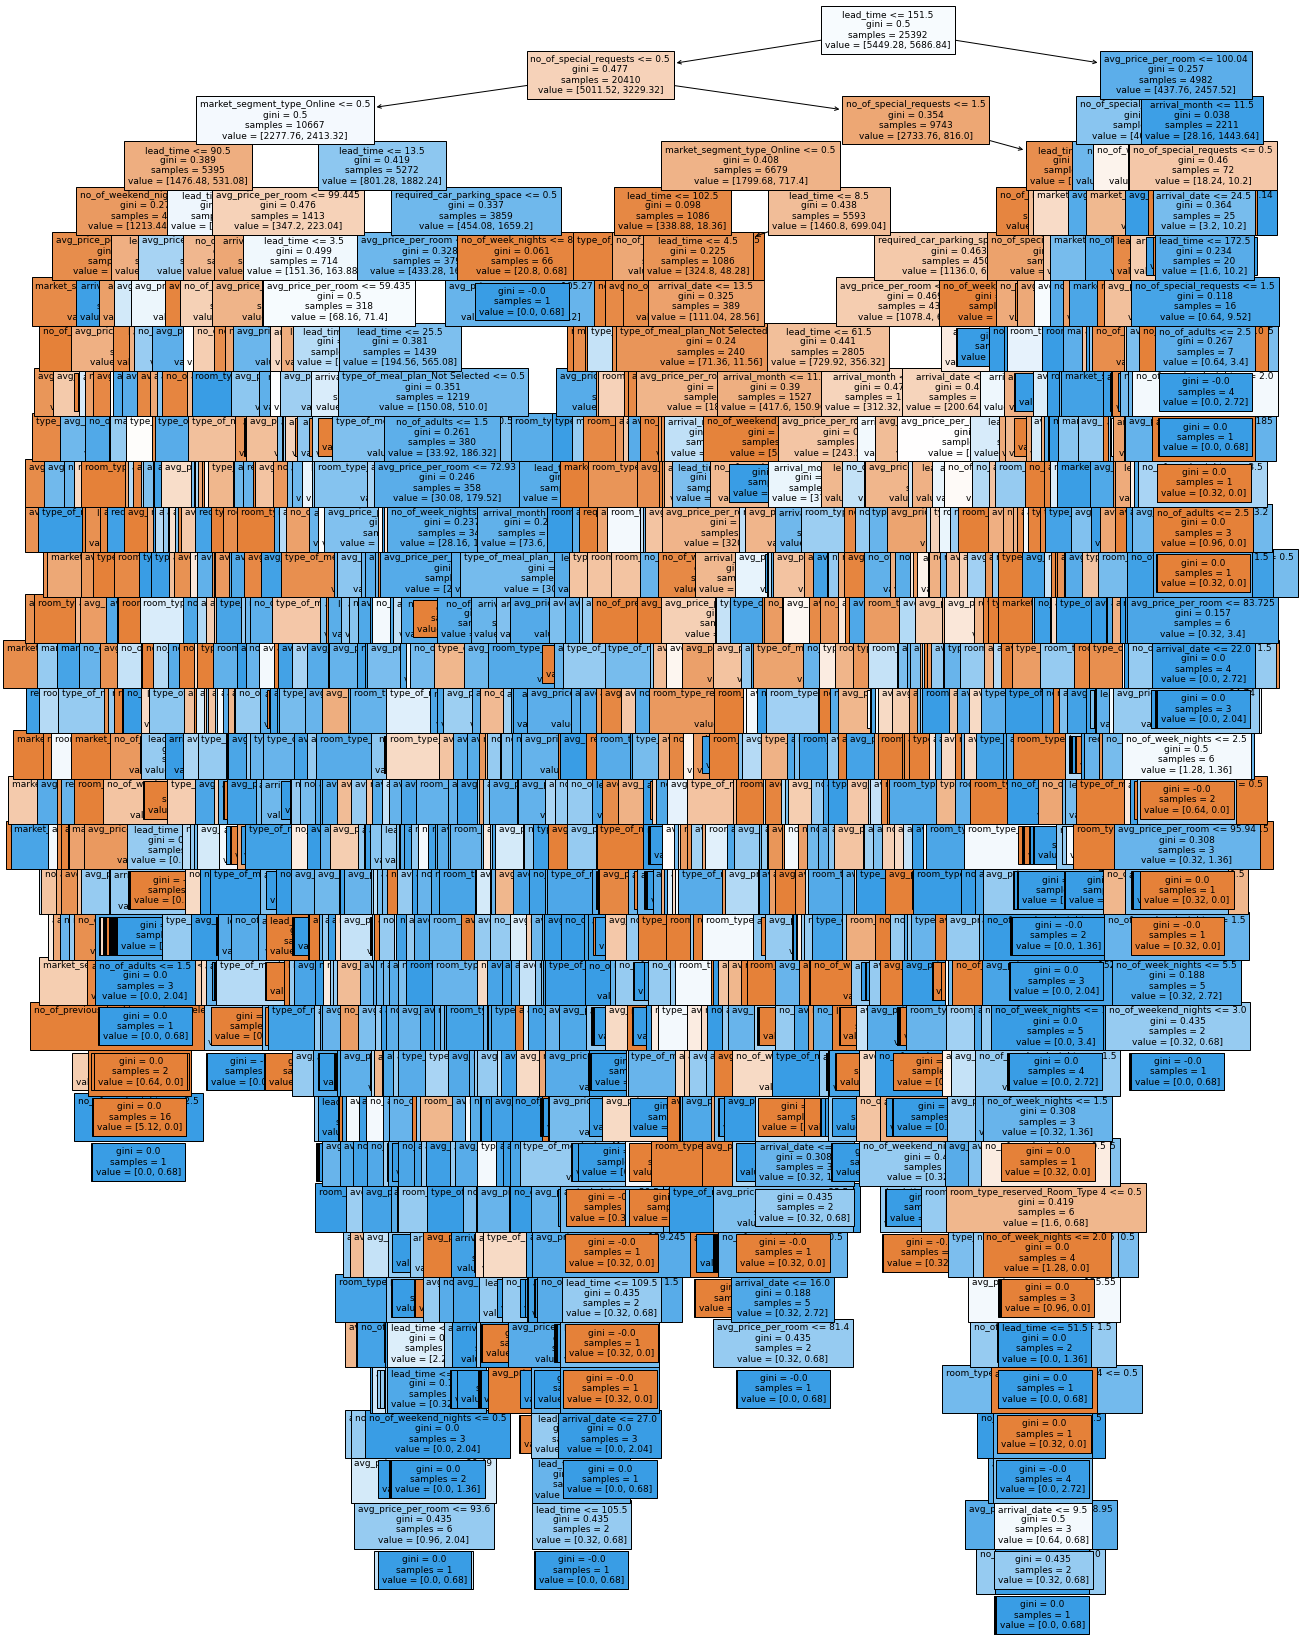

In [186]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [187]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [20.16, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [34.88, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room 

* The tree above is very complex and difficult to interpret.

Let's check which features are most important

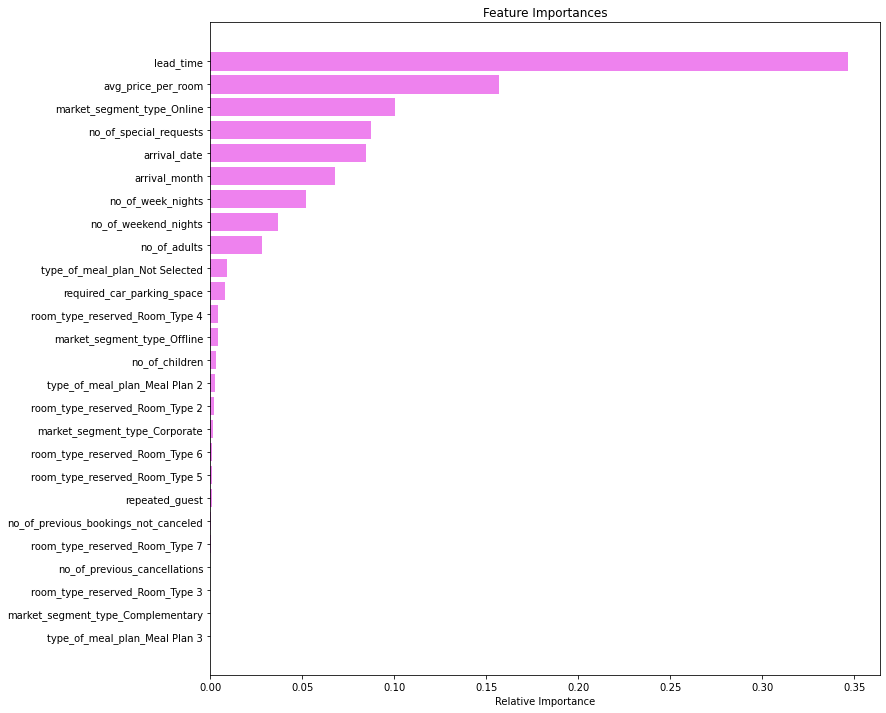

In [189]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Lead time, Average Price per Room and Market Segment Type Online are the top 3 most important features
* This lines up with our finding in EDA

## Do we need to prune the tree?

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [293]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.32, 1: 0.68})

# Grid of parameters to choose from
parameters = {
    "max_depth": [3, 5, 7],
    "max_leaf_nodes": [30, 50, 70, 110, 200, 250],
    "min_samples_split": [10, 30, 50, 70, 110],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68}, max_depth=7,
                       max_leaf_nodes=70, min_samples_split=10, random_state=1)

#### Checking performance on training set

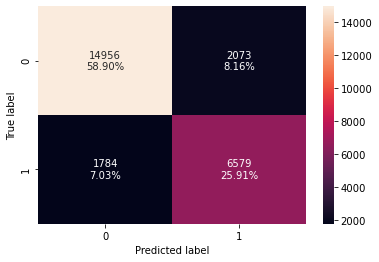

In [294]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [290]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.848102  0.786679   0.760402  0.773318

#### Checking performance on test set

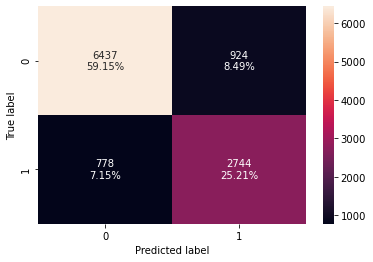

In [295]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [297]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.843609  0.779103   0.748092  0.763282

## Visualizing the Decision Tree

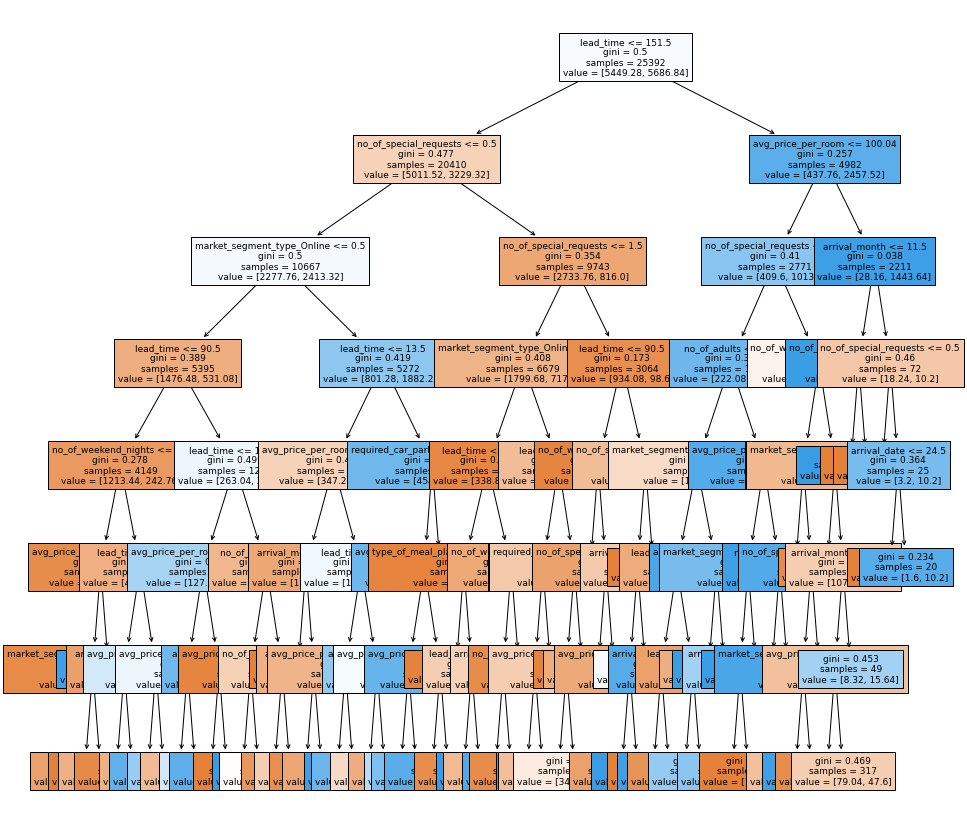

In [298]:
plt.figure(figsize=(15, 15))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [299]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- weights: [230.40, 59.16] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [514.88, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.32, 11.56] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |--- weights: [234.88, 87.72] class: 0
|   |   |   |   |   |   |--- arrival_month >  9.50
|   |   |   |   |   |   |   |--- weights: [177.28, 12.24] class: 0
|   |   |   |   |   |--- lead_time >  6

In [300]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.448154
market_segment_type_Online            0.185350
no_of_special_requests                0.160949
avg_price_per_room                    0.098743
arrival_month                         0.030518
no_of_adults                          0.027737
no_of_weekend_nights                  0.019655
required_car_parking_space            0.013368
no_of_week_nights                     0.007187
market_segment_type_Offline           0.005221
arrival_date                          0.002184
type_of_meal_plan_Not Selected        0.000934
room_type_reserved_Room_Type 4        0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 3        0.000000
type_of_meal_

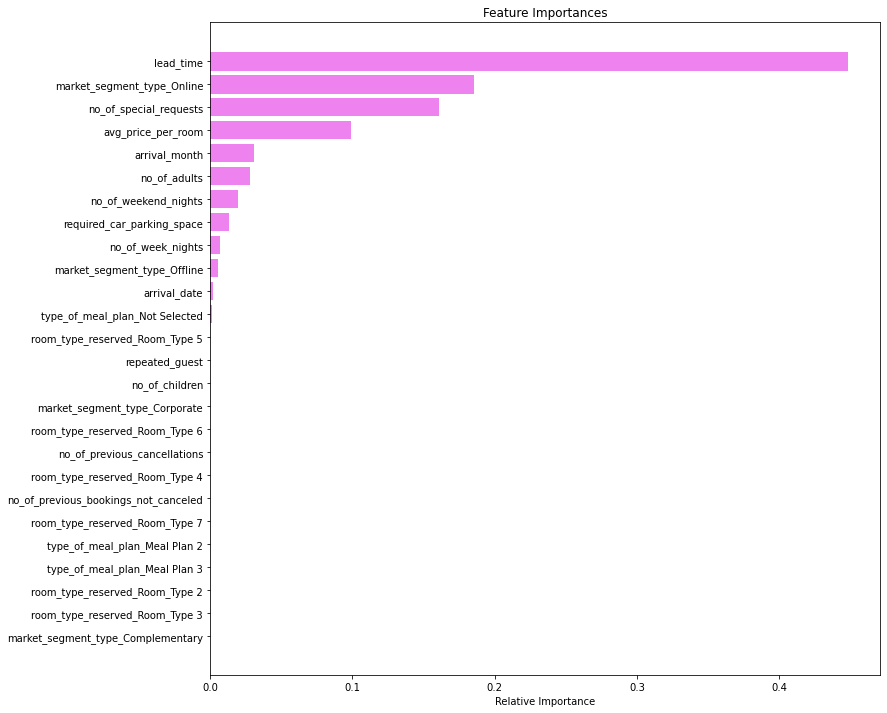

In [302]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* The model is giving a generalized result now. The model is also a lot more simple than before

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [303]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.32, 1: 0.68})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [304]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008371
1     9.570785e-21    0.008371
2     1.914157e-20    0.008371
3     1.914157e-20    0.008371
4     1.914157e-20    0.008371
...            ...         ...
1929  9.114099e-03    0.328783
1930  9.376874e-03    0.338160
1931  1.251962e-02    0.350680
1932  3.437639e-02    0.419432
1933  8.034001e-02    0.499772

[1934 rows x 2 columns]

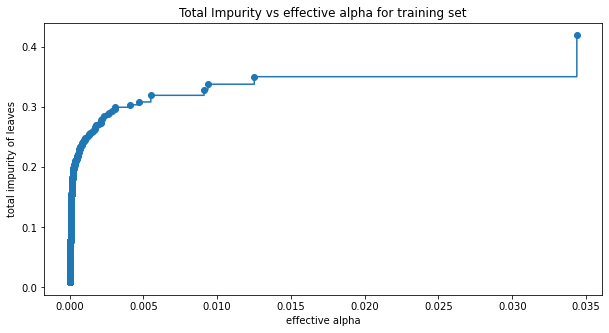

In [305]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [306]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.32, 1: 0.68}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08034001247892869



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

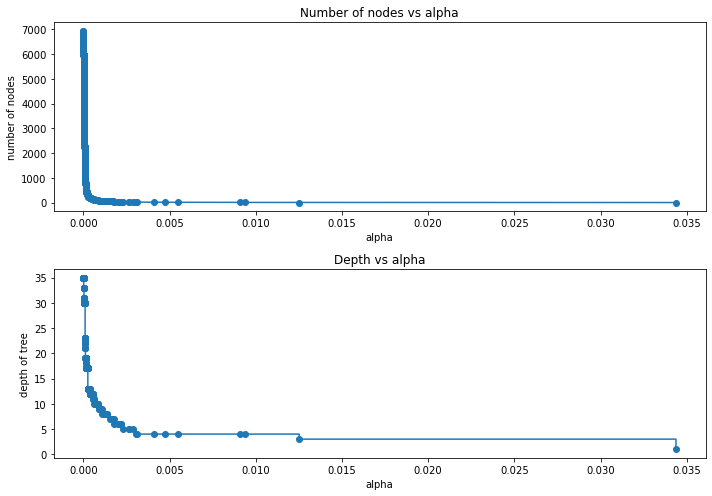

In [307]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 vs alpha for training and testing sets

In [321]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [322]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [323]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

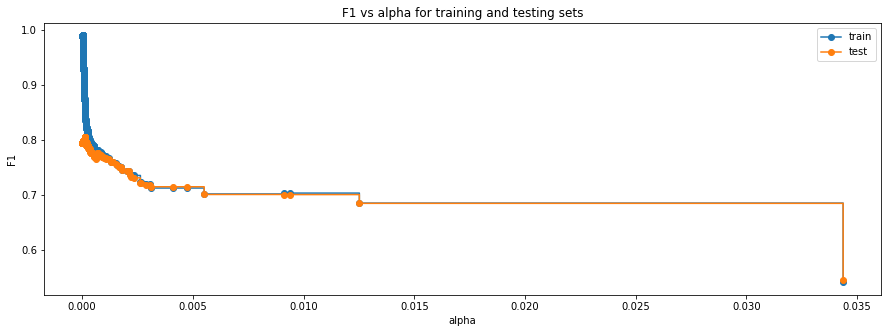

In [324]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [353]:
# creating the model where we get highest train and test f1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001298370651098555,
                       class_weight={0: 0.32, 1: 0.68}, random_state=1)


In [354]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001298370651098555,
                       class_weight={0: 0.32, 1: 0.68}, random_state=1)

#### checking performance on training set

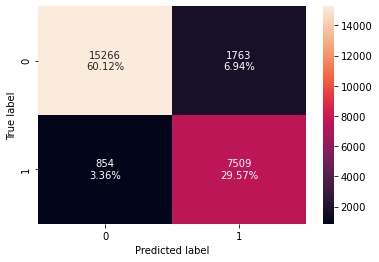

In [355]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [356]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.896936  0.897884   0.809858  0.851602

#### checking performance on test set

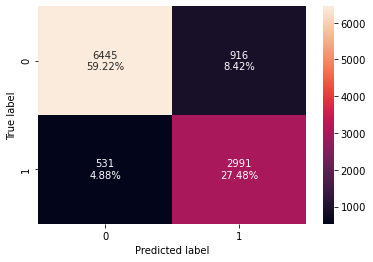

In [357]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [358]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0   0.86704  0.849233   0.765549  0.805223

### Visualizing the Decision Tree

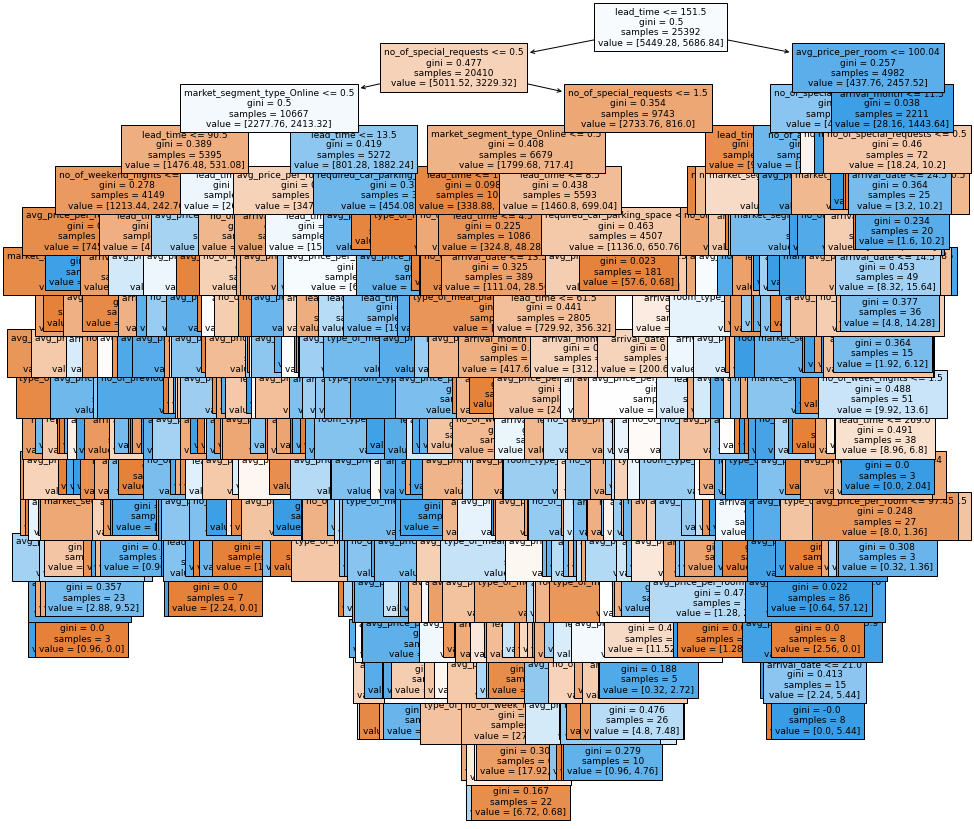

In [333]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually identify potential cancellation 

In [335]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [88.96, 4.76] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |  

In [348]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                           Imp
lead_time                             0.388211
market_segment_type_Online            0.142743
avg_price_per_room                    0.129602
no_of_special_requests                0.123951
arrival_month                         0.065774
arrival_date                          0.040086
no_of_week_nights                     0.030200
no_of_adults                          0.025821
no_of_weekend_nights                  0.025042
required_car_parking_space            0.010295
type_of_meal_plan_Not Selected        0.006430
market_segment_type_Offline           0.005661
room_type_reserved_Room_Type 2        0.001308
type_of_meal_plan_Meal Plan 2         0.000895
no_of_previous_bookings_not_canceled  0.000816
market_segment_type_Corporate         0.000790
room_type_reserved_Room_Type 4        0.000761
room_type_reserved_Room_Type 5        0.000514
room_type_reserved_Room_Type 7        0.000383
room_type_reserved_Room_Type 6        0.000361
repeated_gues

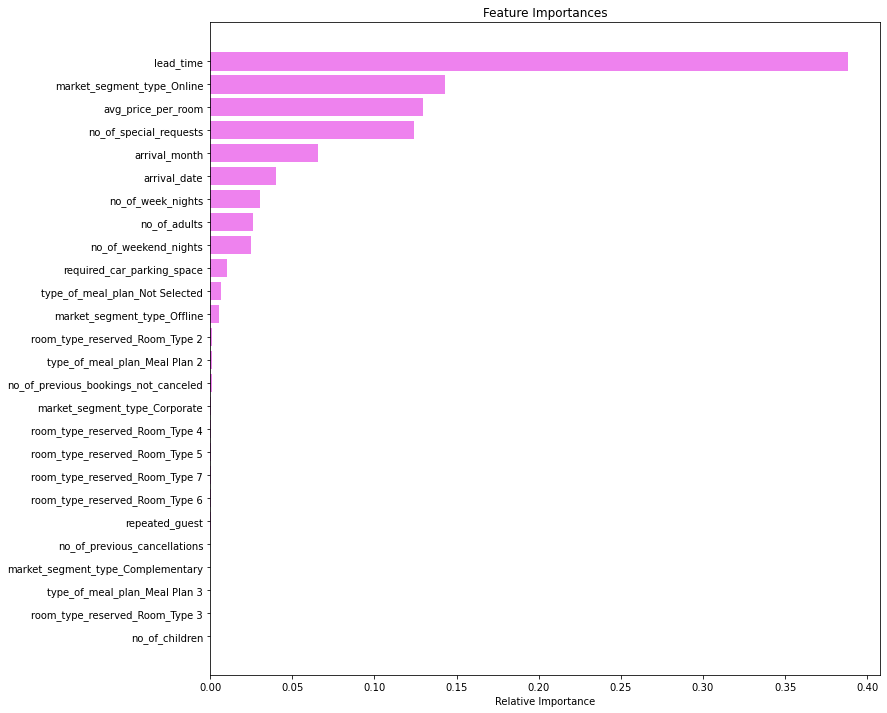

In [337]:
# Here we will see that importance of features has increased

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



**Observation**
* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.
* The tree is very complex and difficult to interprete

## Model Performance Comparison and Conclusions

### Comparing all the decision tree models

In [369]:
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.896936  0.897884   0.809858  0.851602

In [378]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.993108                     0.896936   
Recall                  0.995097                     0.897884   
Precision               0.984153                     0.809858   
F1                      0.989595                     0.851602   

           Decision Tree (Post-Pruning)  
Accuracy                       0.896936  
Recall                         0.897884  
Precision                      0.809858  
F1                             0.851602

In [379]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.864284                     0.867040   
Recall                  0.807496                     0.849233   
Precision               0.780675                     0.765549   
F1                      0.793859                     0.805223   

           Decision Tree (Post-Pruning)  
Accuracy                       0.867040  
Recall                         0.849233  
Precision                      0.765549  
F1                             0.805223

* Decision tree model with pre-pruning has given the best F1 score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Actionable Insights and Recommendations

- We have built three different models. A Logistic Regression, Decission Tree Pre-Pruned and Decision Tree Post-Pruned
- The tree with post pruning is the most difficult to interprete, but is giving us higher performance. The Logistic Regression model has the least F1 score on the training dataset of .69
- The top two in terms of performance are pre-pruned tree (.76) and cost-complexity tree (.8). However, the cost-complexity tree is a very long complex tree that would be difficult to implement in the business. Therefore, Pre-Pruned Decision might be the best model to use for identifying booking status 
- Based on our model, the most statistically significant variables are, lead_time, market_segment_type_online, avg_price_per_room, no_of_special_requests, arrival_month, no_of_adults, no_of_weekend_nights and required_car_parking_place, no_of_week_nights and maket_segment_type_offline


- lead_time is the biggest factor in determining whether a booking would be cancelled or not. The larger the lead time is, the higher the possibility of the booking being cancelled
- From the EDA we observed that, the cancellation is specially high among customers who booked a hotel a while back at a higher than average price
- INN Hotel could offer complimentary promotion for these booking with high lead time and higher than average price, if the booking is identified as at the risk of being cancelled
- Another important variable is market_segment_type_online. 63% of the bookings are place through online platform. Among these online booking, close to 40% of the bookings are cancelled. The convenience of online booking also makes it easy to cancel. The business could tighten the online booking policy where the customer has less day before they can no longer cancel. However this needs to be done carefully as the Hotel may drive some customers away who are more keen on convenience and flexibility
- Repeated guests has negative correlation with the booking status. Most of the cancellations come from the new customers, which is something the business could leverage in their marketing. The Hotel could emphasize how they are a favorite among people and once you experience the hospitality of the place, you would want to always come back
- Arrival month is another importan feature that is correlated with the booking status. For example, when the average price is > 99 and lead_time is greater than 3, any booking placed for before august will have a chance of being cancelled. We can also see, the booking placed for later in the year, specially those with less lead time has less chance of being canelled
- The bookings asking for special requests has less chance of being cancelled. The Hotel could have a team making sure those customers are provided the best of service, so that are willing to come back. It will be a great way to expand customer base

All in all given the fact that returning customers has less chance of cancelling, the hotel should focus on expanding their customer base. They could focus on marketing themseleves as trusted by their customers. Also could establish a point system so that guests have more incentives to return. 

For the rooms that are booked far ahead, the business have emails sent out to those customers with local travel tips, promotions, to get the customers excited about staying in the hotel. 

Lastly, for Online bookings, during cancellation, the hotel could offer the refund with discount but in points form, giving the customers the incentive to visit next time. 

